# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1901]:
#importing all necessary libraries


import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

import statsmodels.api
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.api import add_constant

## Loading data

In [1902]:
hotel_data = pd.read_csv("INNHotelsGroup.csv") #loading the dataset
hotel_data.head(15)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0    INN00001             2               0                     1   
1    INN00002             2               0                     2   
2    INN00003             1               0                     2   
3    INN00004             2               0                     0   
4    INN00005             2               0                     1   
5    INN00006             2               0                     0   
6    INN00007             2               0                     1   
7    INN00008             2               0                     1   
8    INN00009             3               0                     0   
9    INN00010             2               0                     0   
10   INN00011             1               0                     1   
11   INN00012             1               0                     2   
12   INN00013             2               0                     2   
13   INN00014             1               0                     2   
14   INN00015             2               0                     0   

    no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                   2       Meal Plan 1                           0   
1                   3      Not Selected                           0   
2                   1       Meal Plan 1                           0   
3                   2       Meal Plan 1                           0   
4                   1      Not Selected                           0   
5                   2       Meal Plan 2                           0   
6                   3       Meal Plan 1                           0   
7                   3       Meal Plan 1                           0   
8                   4       Meal Plan 1                           0   
9                   5       Meal Plan 1                           0   
10                  0      Not Selected                           0   
11                  1       Meal Plan 1                           0   
12                  1      Not Selected                           0   
13                  0       Meal Plan 1                           0   
14                  2       Meal Plan 1                           0   

   room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0         Room_Type 1        224          2017             10             2   
1         Room_Type 1          5          2018             11             6   
2         Room_Type 1          1          2018              2            28   
3         Room_Type 1        211          2018              5            20   
4         Room_Type 1         48          2018              4            11   
5         Room_Type 1        346          2018              9            13   
6         Room_Type 1         34          2017             10            15   
7         Room_Type 4         83          2018             12            26   
8         Room_Type 1        121          2018              7             6   
9         Room_Type 4         44          2018             10            18   
10        Room_Type 1          0          2018              9            11   
11        Room_Type 4         35          2018              4            30   
12        Room_Type 1         30          2018             11            26   
13        Room_Type 1         95          2018             11            20   
14        Room_Type 1         47          2017             10            20   

   market_segment_type  repeated_guest  no_of_previous_cancellations  \
0              Offline               0                             0   
1               Online               0                             0   
2               Online               0                             0   
3               Online               0                             0   
4               Online               0                             0   
5               Online               0                          

In [1903]:
# copying data to another varaible to avoid any changes to original data
hotel_data1 = hotel_data.copy()

## Data Overview

- Observations
- Sanity checks

In [1904]:
hotel_data1.shape

(36275, 19)

In [1905]:
hotel_data[hotel_data.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No duplicated data.

## Statistical summary

In [1906]:
hotel_data1.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

The mean arrival year is 2017, the average price was €120 but, also the most price for a room was also €540 which has a lot of gap. Most people barely had 1 special request even, 75% had only one but, also maximum was upto 5 requests. We should double check the whiskers.

In [1907]:
# checking for unique values in ID column
hotel_data1["Booking_ID"].nunique()

36275

In [1908]:
hotel_data1.drop(["Booking_ID"], axis=1, inplace=True)

Since, it's all values are unique. We do not need to carry it further anymore.

### Check the data types of the columns for the dataset.

In [1909]:
hotel_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

We have 4 object columns and one float. We should convert the objects to category as for prediction purposes.


Converting all the 'object' type data into the type 'category'

In [1910]:
for i in hotel_data1.columns: # Loop through all columns in the dataframe
    if hotel_data1[i].dtype == 'object': # Only apply for columns with categorical strings
        hotel_data1[i] = pd.Categorical(hotel_data1[i])# Replace strings with an integer
hotel_data1.head(10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   
5             2               0                     0                  2   
6             2               0                     1                  3   
7             2               0                     1                  3   
8             3               0                     0                  4   
9             2               0                     0                  5   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   
5       Meal Plan 2                           0        Room_Type 1        346   
6       Meal Plan 1                           0        Room_Type 1         34   
7       Meal Plan 1                           0        Room_Type 4         83   
8       Meal Plan 1                           0        Room_Type 1        121   
9       Meal Plan 1                           0        Room_Type 4         44   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   
5          2018              9            13              Online   
6          2017             10            15              Online   
7          2018             12            26              Online   
8          2018              7             6             Offline   
9          2018             10            18              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   
5               0                             0   
6               0                             0   
7               0                             0   
8               0                             0   
9               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   
6                                     0              107.55   
7                                     0              105.61   
8                                     0               96.90   
9                                     0              133.44   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled  
5          

In [1911]:
hotel_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

We see that we have 4 categorical columns where, one of them being float column. And, rest of them has the data type 'integer'.

## Checking for null values

In [1912]:
hotel_data1.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No null values or missing data to take care of.

In [1913]:
categ_col = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']
for i in categ_col:
    print(hotel_data1[i].value_counts())
    print("&" * 50)

#value_counts() will give how much of what element of data is in the selected categorical columns

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [1914]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="bright",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [1915]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [1916]:
hotel_data1.head()
#will generate the first few rows and columns of the data

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

Busiest Month Observation

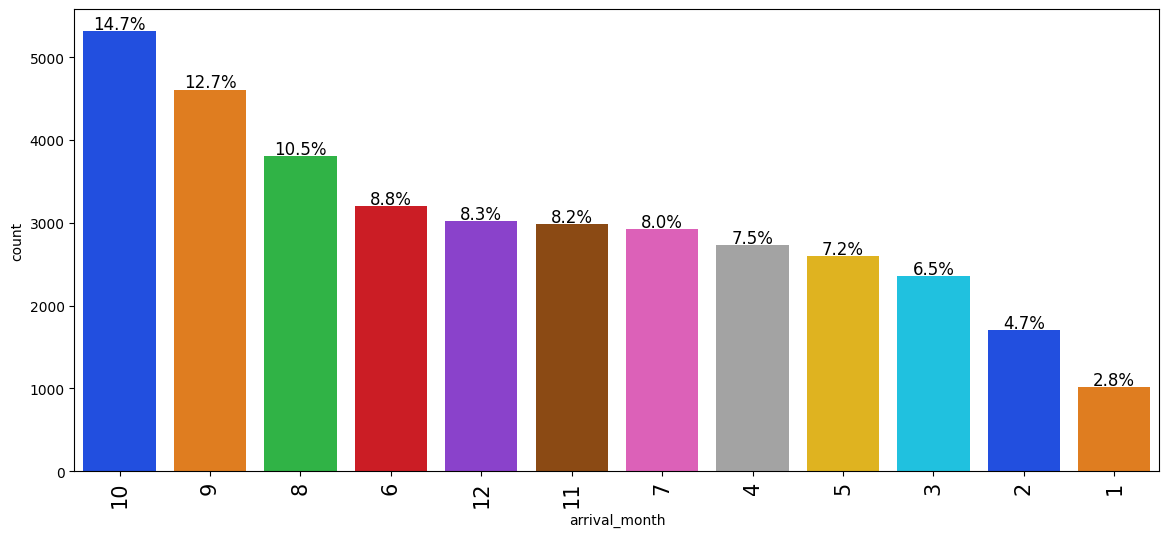

In [1917]:
labeled_barplot(hotel_data1, "arrival_month", perc=True)

The most busiest month was October (14.7%) and the least busiest month was the January 
(2.8%).

Market Segment

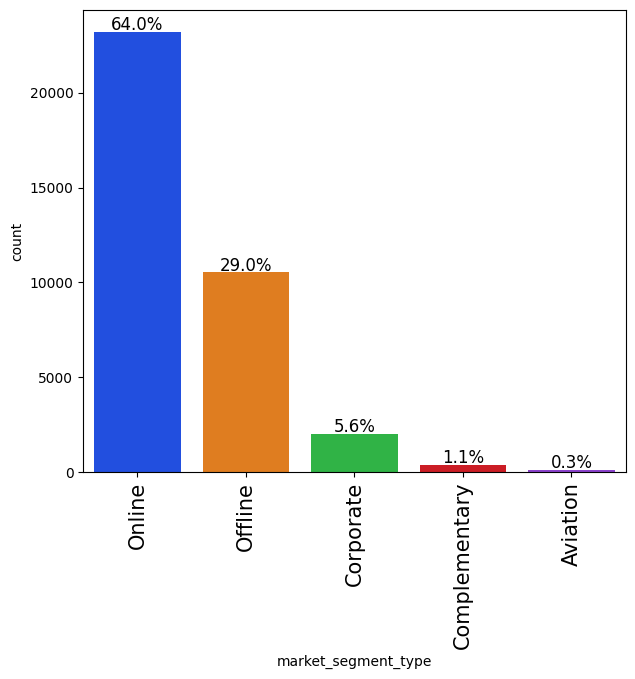

In [1918]:
labeled_barplot(hotel_data1, "market_segment_type", perc=True)
#will generate a barplot

Most people were online customers (~64.0%).

Types of Meal Plan

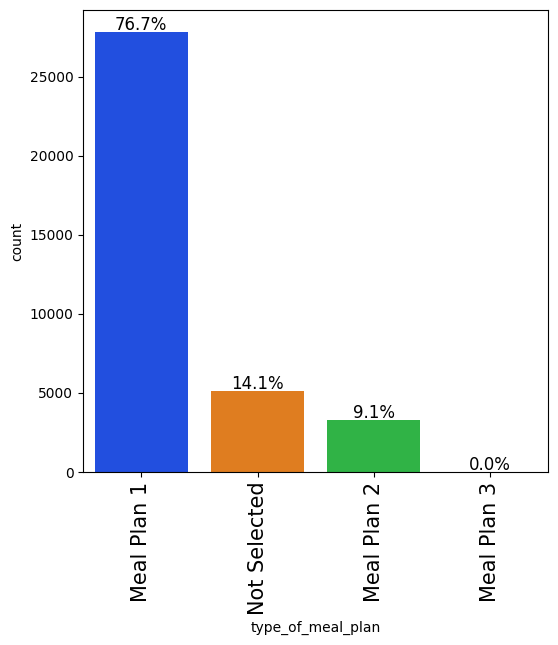

In [1919]:
labeled_barplot(hotel_data1,"type_of_meal_plan",perc = True)
#will generate a barplot

Meal plan 1 was the most popular (~ 76.7%).

Repeated Guest

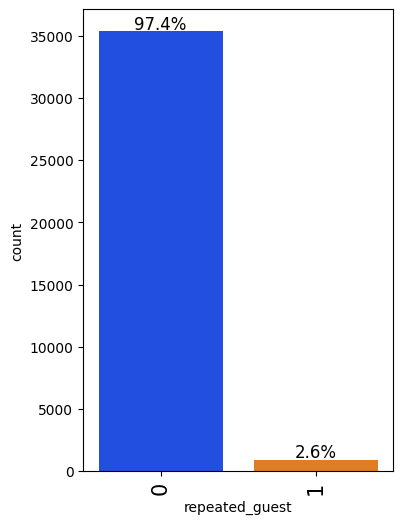

In [1920]:
labeled_barplot(hotel_data1,"repeated_guest",perc = True)
#will generate a barplot

Most guests only came for once and didn't come back (~ 97.4%).

Arrival year

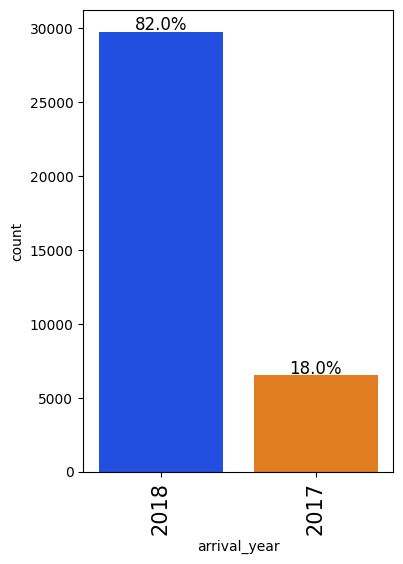

In [1921]:
labeled_barplot(hotel_data1,"arrival_year",perc = True)
#will generate a barplot

Most of the people came in the year 2018 among the recent years. (~ 82.0 %)

Average price per room

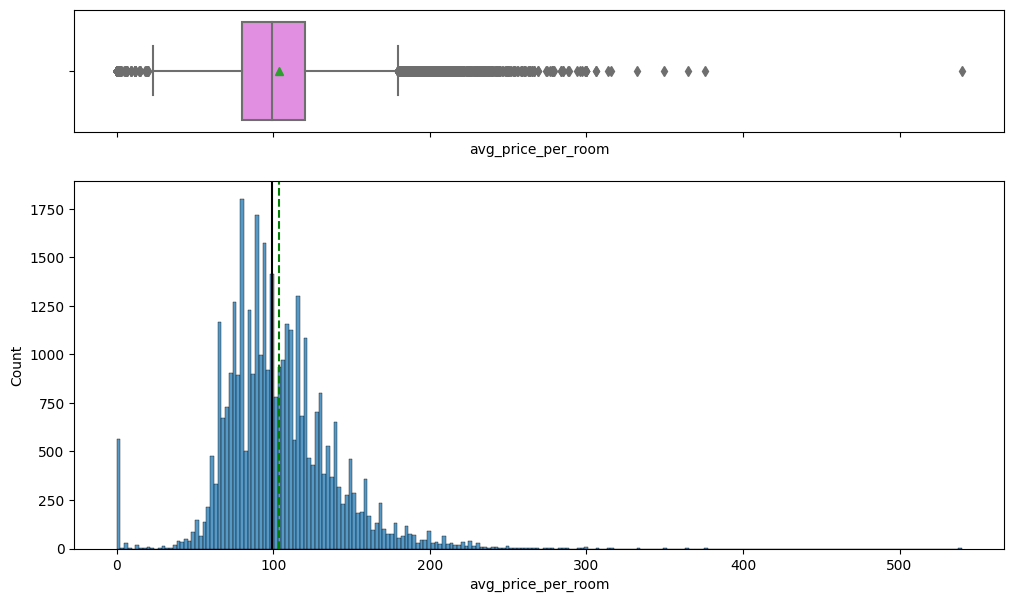

In [1922]:
histogram_boxplot(hotel_data1,"avg_price_per_room")
#will generate a boxplot

The average price is atleast 100 Euros but, it isn't the most popular price obviously.

Arrival Month

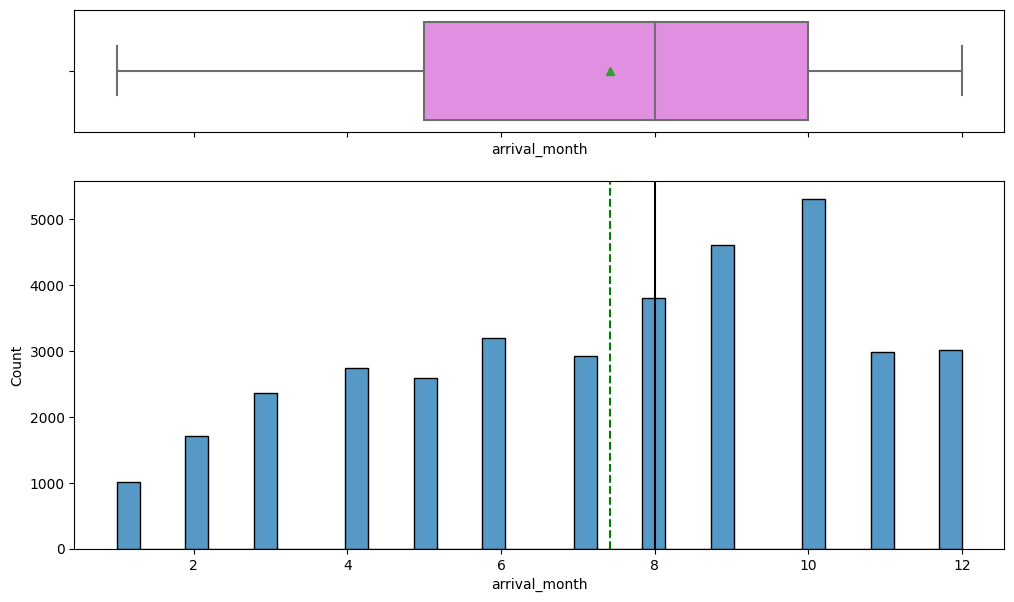

In [1923]:
histogram_boxplot(hotel_data1,"arrival_month")
#will generate a boxplot

The most popular month was October but, most people chose to come August.

Lead Time

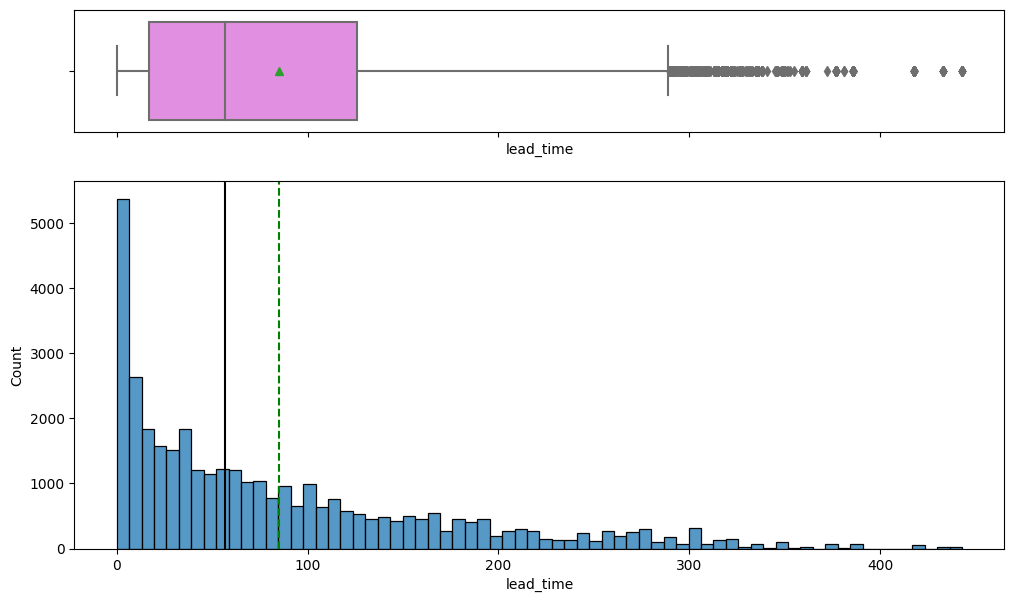

In [1924]:
histogram_boxplot(hotel_data1,"lead_time")

The average lead time was 50 days.

Booking status

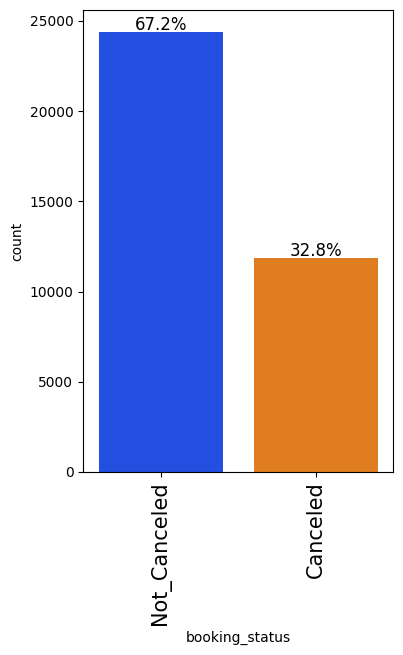

In [1925]:
labeled_barplot(hotel_data1, 'booking_status', perc=True, n=None)
# will generate a barplot

Most of the people didn't cancel(~ 67.2%).

Number of Adults

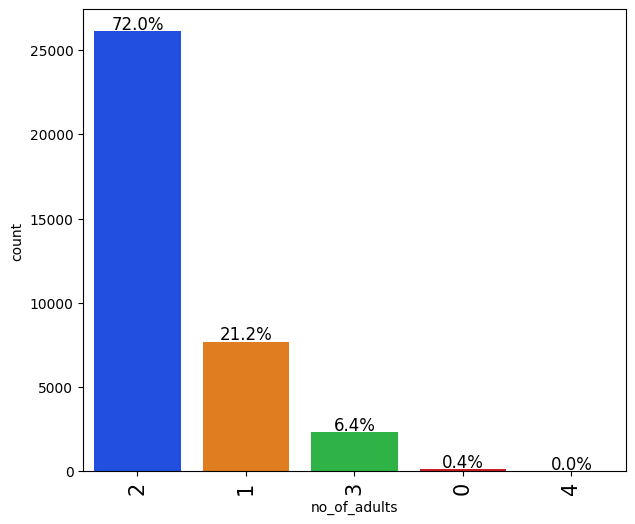

In [1926]:
labeled_barplot(hotel_data1, 'no_of_adults', perc=True, n=None)

Atleast 72% were two adult tourists together where also people alone and with family came too.

Number of Childrens

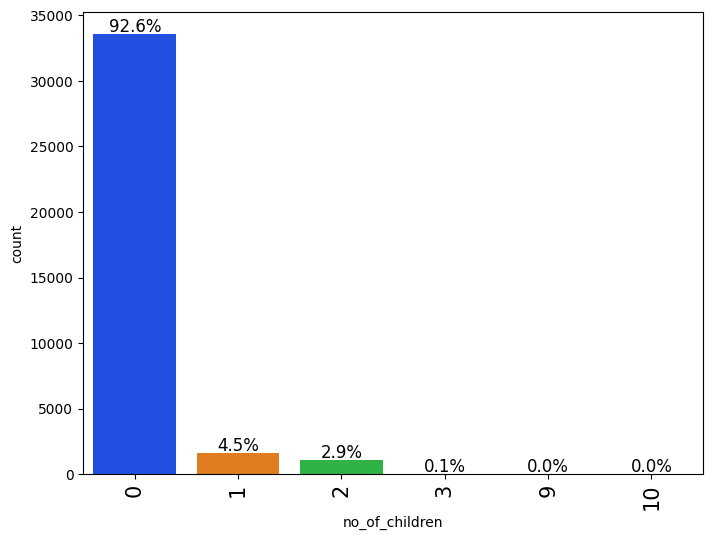

In [1927]:
labeled_barplot(hotel_data1, 'no_of_children', perc=True, n=None)
#will generate a barplot visualization

We can see that almost all the tourists had no children at all.

Number of Week nights

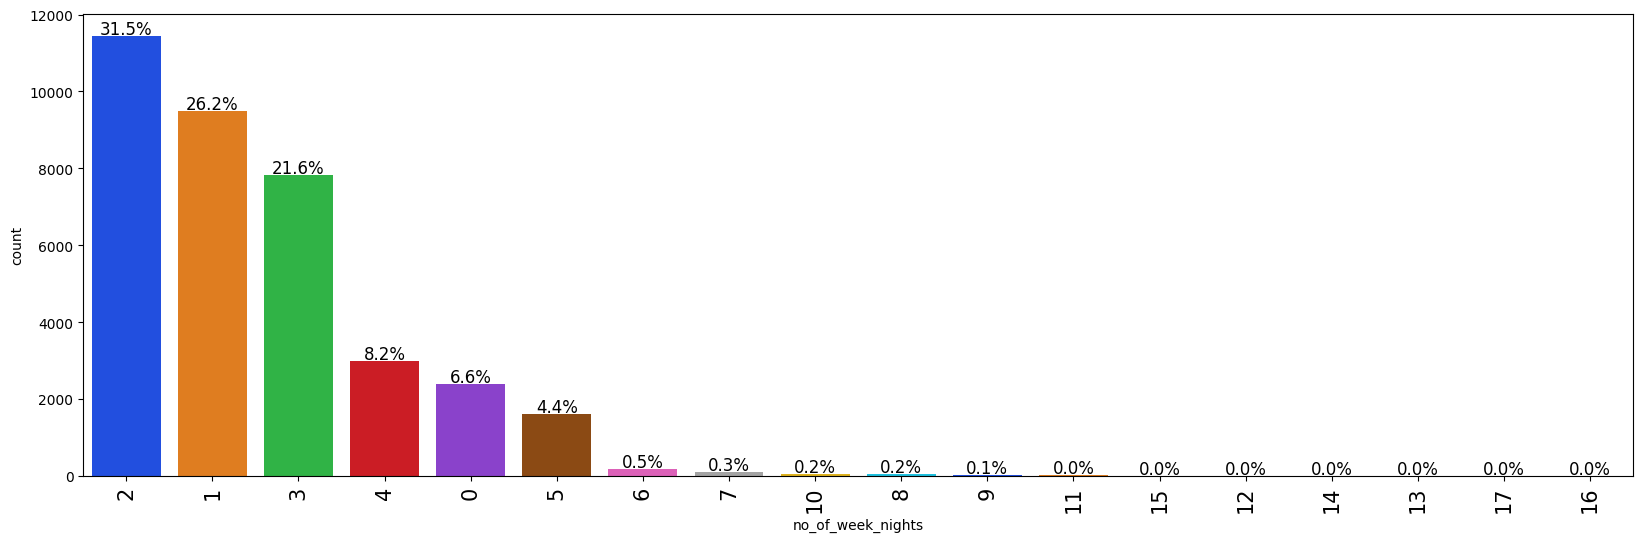

In [1928]:
labeled_barplot(hotel_data1, 'no_of_week_nights', perc=True, n=None)
#will generate a barplot visualization

The popular number of days were 2 only for a stay. But, also people chose to stay 3 and 4 days too.

Number of Weekend nights

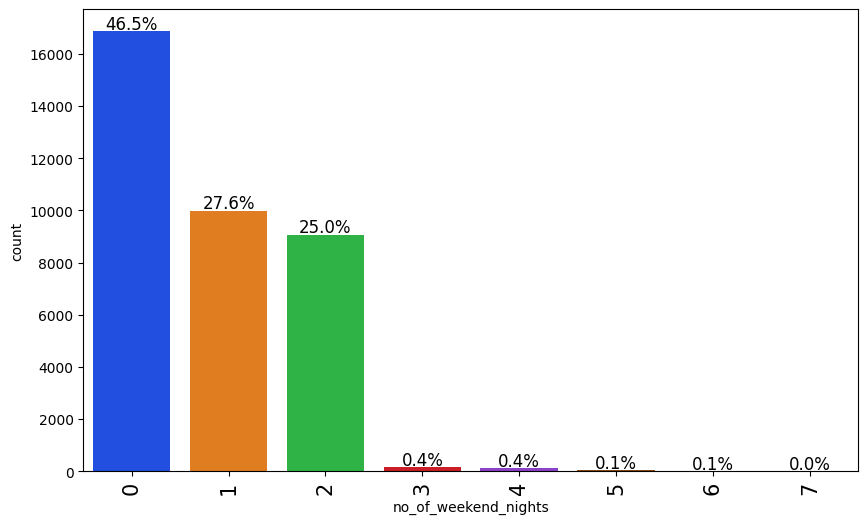

In [1929]:
labeled_barplot(hotel_data1, 'no_of_weekend_nights', perc=True, n=None)

Most people chose not to come on weekends so, it says that most customers aren't locals. And customers had a preference of atleast one weekend night or two mostly.

Car Parking Space 

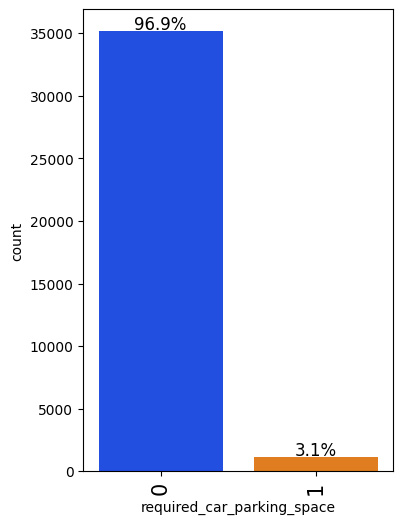

In [1930]:
labeled_barplot(hotel_data1, 'required_car_parking_space', perc=True, n=None)
# will generate barplot

Almost 97% people didn't book a parking space which says a lot about how this is really less important in the big scenario.

## Bi-variate Analysis

Room Price Vs Market Segments

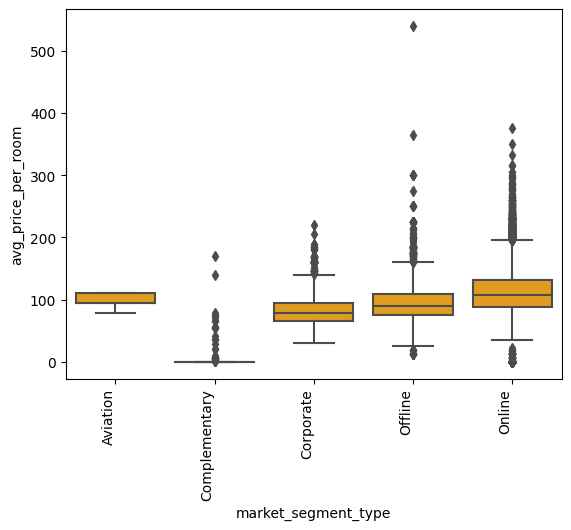

In [1931]:
sns.boxplot(
    x='market_segment_type', 
    y='avg_price_per_room',                  
    data=hotel_data1,                            #generates a boxplot comparing landing pages and time spent on it
    color='orange')
plt.xticks(rotation = 90, ha='right');

The average room price is a little higher than the offline but, both online and offline room prices has whiskers which may tell that when room booked in popular timings customers had to pay the overprice. But, also for corporates and aviation since, these are on contacts and more rooms their average price seemed bit low.

Repeating Guests Vs Cancel-lation

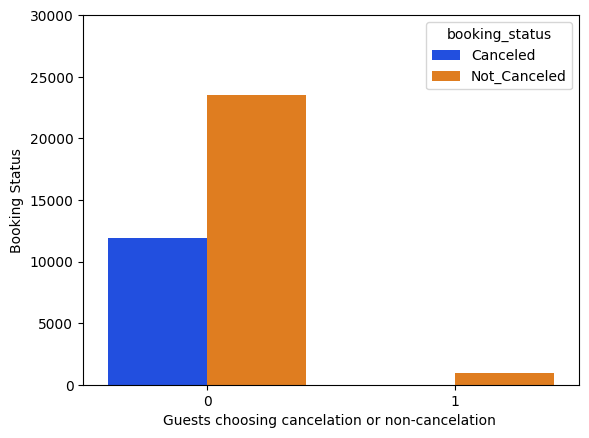

In [1932]:
# Write the code here
#code shows the popularity of different cuisines based on weekdays and weekends
bar2 = sns.countplot(data=hotel_data1, x='repeated_guest',hue='booking_status',palette = 'bright')
bar2.set_xlabel("Guests choosing cancelation or non-cancelation ")
bar2.set_ylabel("Booking Status")
bar2.set_ylim([0,30000]);

We can see that on a large scale the repeating guests barely canceled.

Special requests Vs Booking Status

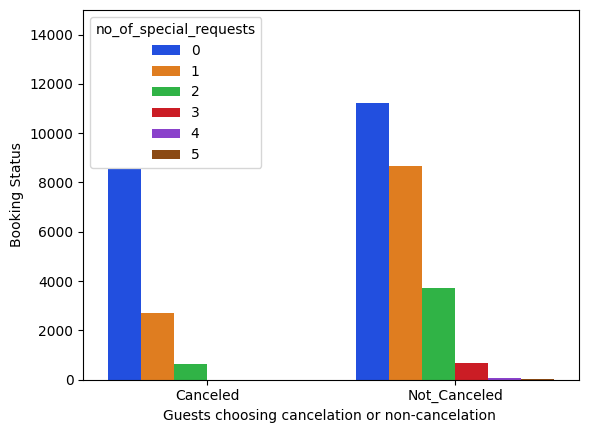

In [1933]:
# Write the code here
#code shows the popularity of different cuisines based on weekdays and weekends
bar2 = sns.countplot(data=hotel_data1, x='booking_status',hue='no_of_special_requests',palette = 'bright')
bar2.set_xlabel("Guests choosing cancelation or non-cancelation ")
bar2.set_ylabel("Booking Status")
bar2.set_ylim([0,15000]);

Most people who either canceled or didn't cancel had no requests as we see. But, also people with atleast 1 and 2 requests can be seen canceling the services which actually backfired hotel's preparation regarding the amount of special requests. This can also say that the leverage of cancelation isn't too much that's why the customers were able to make the decision.

Lead Time Vs Booking Status

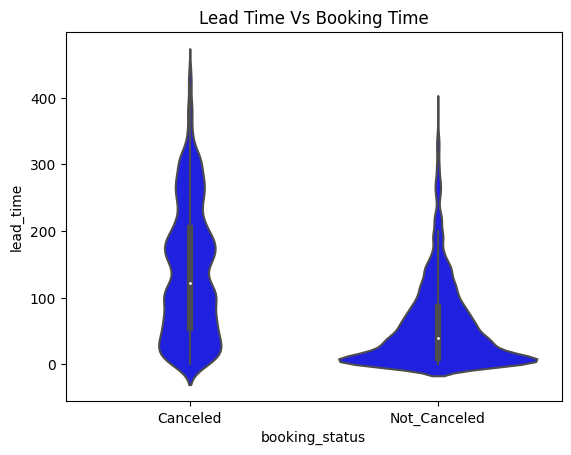

In [1934]:
sns.violinplot(
    x='booking_status', 
    y='lead_time', 
    data=hotel_data1, 
    color='blue');
plt.title("Lead Time Vs Booking Time");

We can see that as the lead time increased there were more cancelations than ever, which signifies a huge loss for the hotel's overall profit.

Average Price vs Arrival Month

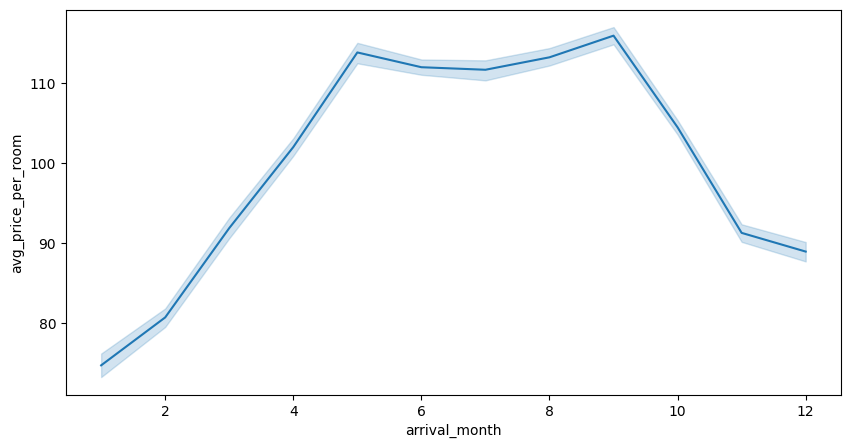

In [1935]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hotel_data1, x='arrival_month', y='avg_price_per_room')
plt.show()

Overall multi-colinearity among the variables

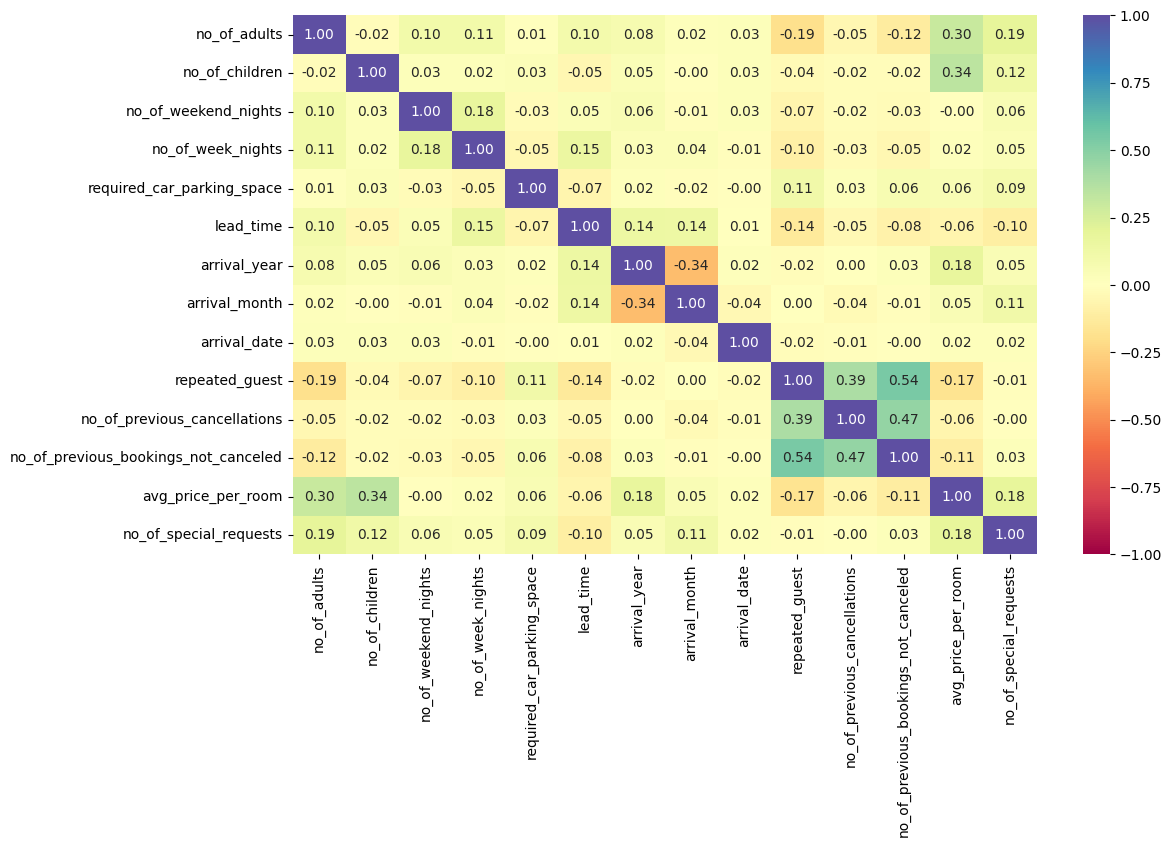

In [1936]:
cols_list = hotel_data1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    hotel_data1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

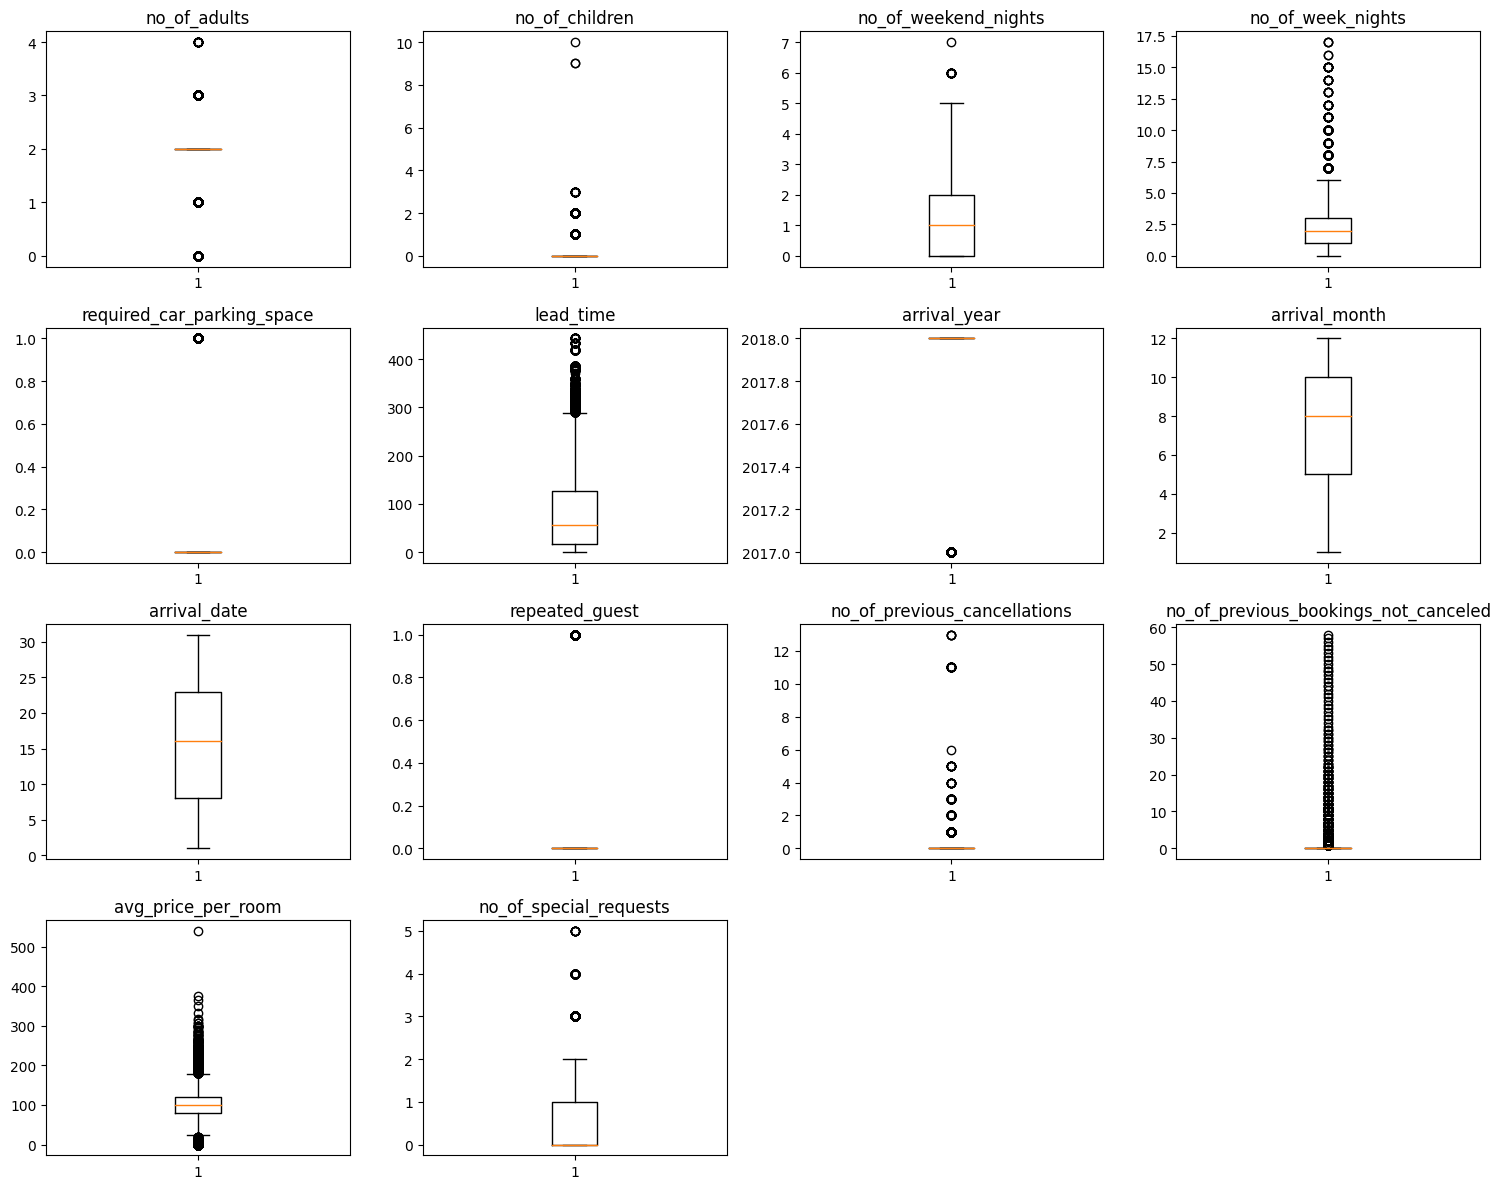

In [1937]:
# outlier detection using boxplot
numeric_columns = hotel_data1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(hotel_data1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Outliers Treatment 

Functions to treat outliers by flooring and capping

In [1938]:
def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df

In [1939]:
def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [1940]:
numerical_col = hotel_data1.select_dtypes(include=np.number).columns.tolist()
hotel_data1 = treat_outliers_all(hotel_data1, numerical_col)

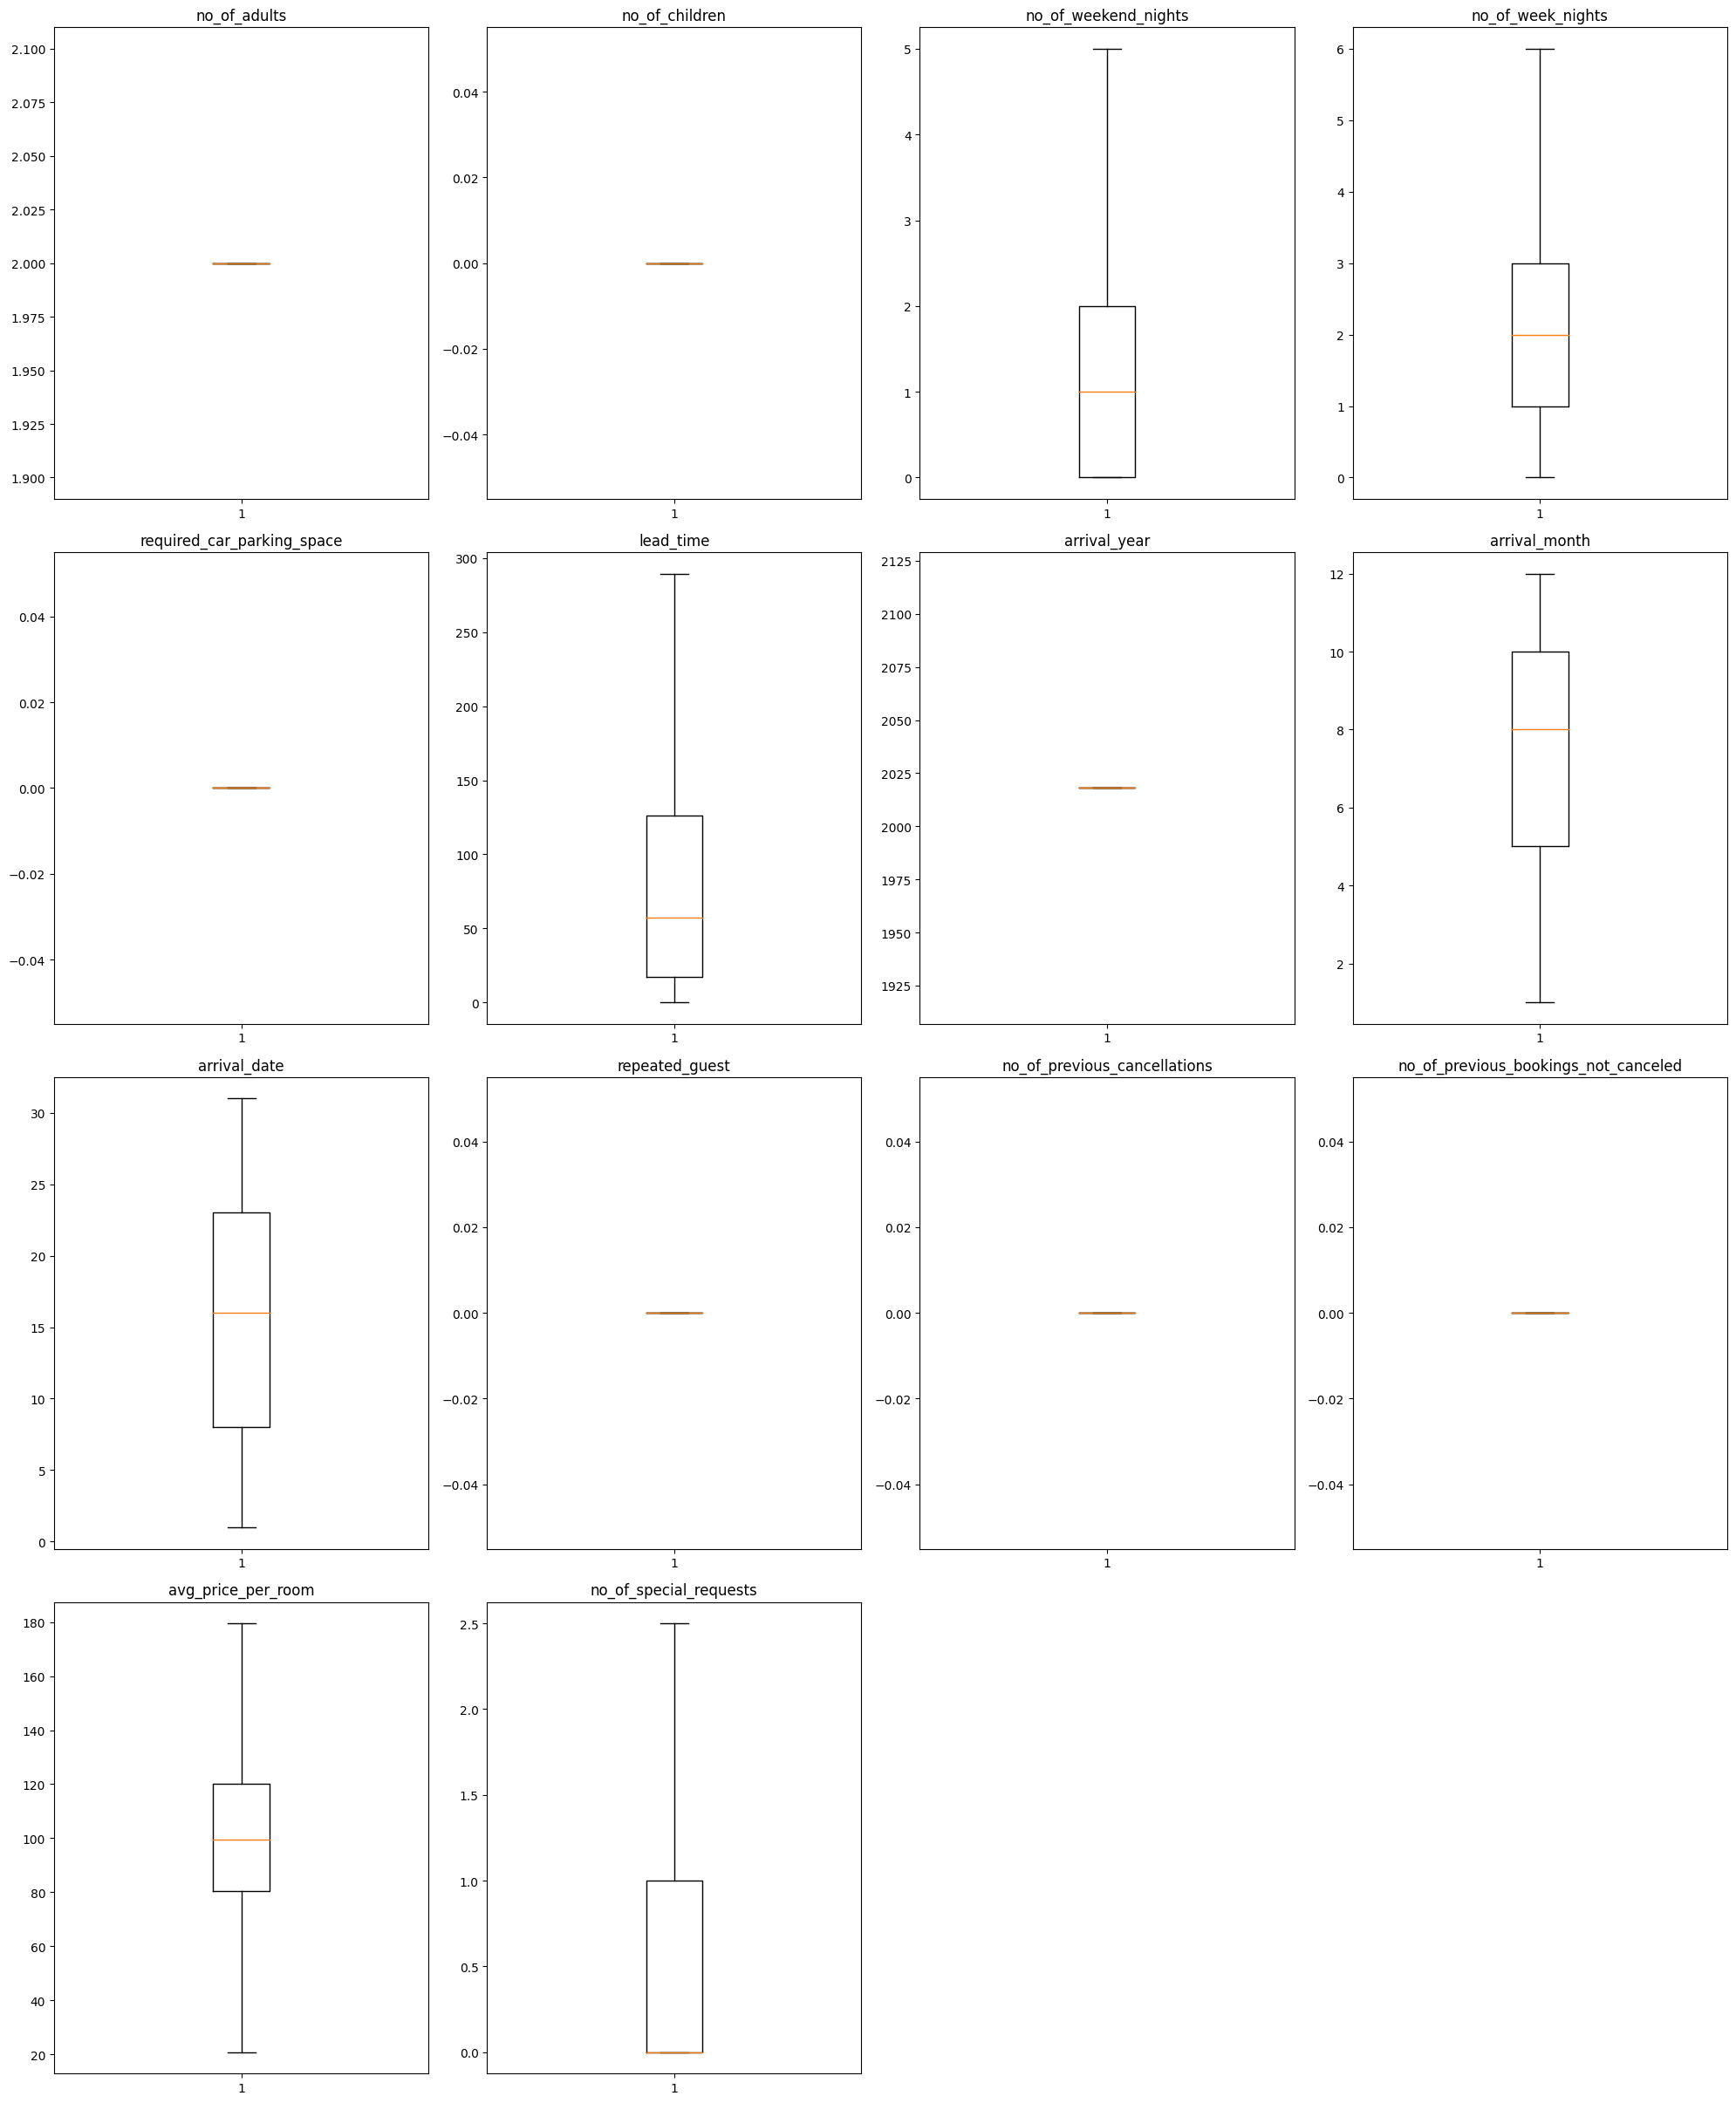

In [1941]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(hotel_data1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

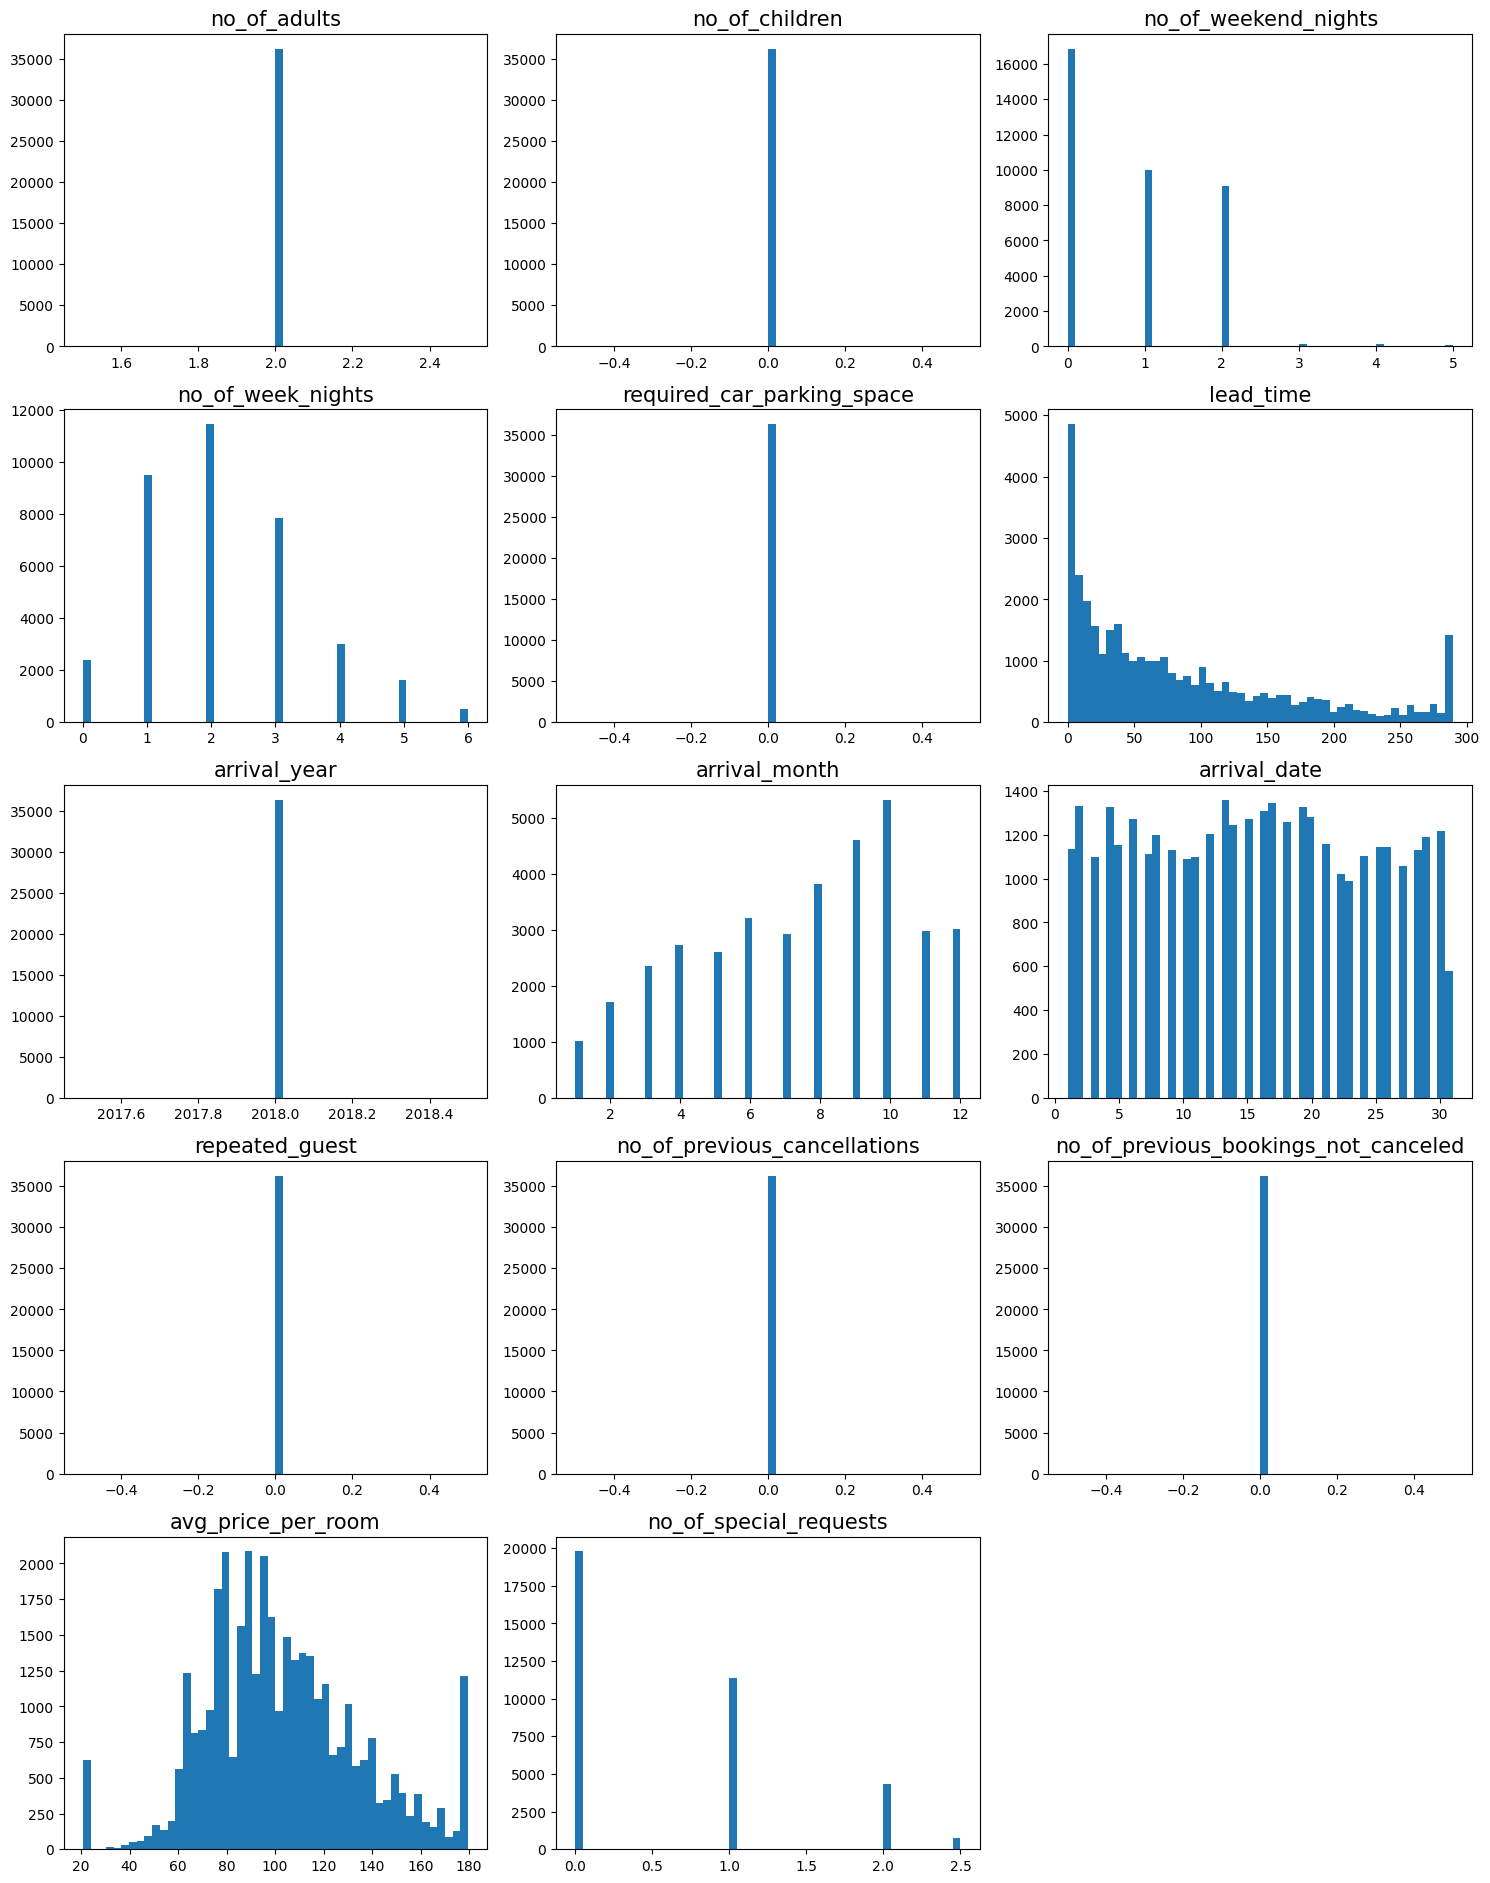

In [1942]:
# creating a list of columns
colmns = [
    i for i in hotel_data1.select_dtypes(include=np.number).columns 
]

plt.figure(figsize=(15, 45))
#looping the list and ploting histograms
for i in range(len(colmns)):
    plt.subplot(12, 3, i + 1)
    plt.hist(hotel_data1[colmns[i]], bins=50)
    plt.tight_layout()
    plt.title(colmns[i], fontsize=15)

plt.show()

In [1943]:
# removing because they are close to normal
colmns.remove('no_of_week_nights')
colmns.remove('no_of_adults')
colmns.remove('avg_price_per_room')
# removing becasue they are boolean or time related. 
colmns.remove('arrival_date')
colmns.remove('arrival_month')
colmns.remove('arrival_year')
colmns.remove('required_car_parking_space')
colmns.remove('repeated_guest')
# removing becasue I have a different treatment in mind
colmns.remove('lead_time')

In [1944]:
for i in colmns:
    hotel_data1[i + "_log"] = np.log(hotel_data1[i] + 1)

hotel_data1.drop(colmns, axis=1, inplace=True)
hotel_data1.head()

no_of_adults  no_of_week_nights type_of_meal_plan  \
0             2                  2       Meal Plan 1   
1             2                  3      Not Selected   
2             2                  1       Meal Plan 1   
3             2                  2       Meal Plan 1   
4             2                  1      Not Selected   

   required_car_parking_space room_type_reserved  lead_time  arrival_year  \
0                           0        Room_Type 1      224.0          2018   
1                           0        Room_Type 1        5.0          2018   
2                           0        Room_Type 1        1.0          2018   
3                           0        Room_Type 1      211.0          2018   
4                           0        Room_Type 1       48.0          2018   

   arrival_month  arrival_date market_segment_type  repeated_guest  \
0             10             2             Offline               0   
1             11             6              Online               0   
2              2            28              Online               0   
3              5            20              Online               0   
4              4            11              Online               0   

   avg_price_per_room booking_status  no_of_children_log  \
0               65.00   Not_Canceled                 0.0   
1              106.68   Not_Canceled                 0.0   
2               60.00       Canceled                 0.0   
3              100.00       Canceled                 0.0   
4               94.50       Canceled                 0.0   

   no_of_weekend_nights_log  no_of_previous_cancellations_log  \
0                  0.693147                               0.0   
1                  1.098612                               0.0   
2                  1.098612                               0.0   
3                  0.000000                               0.0   
4                  0.693147                               0.0   

   no_of_previous_bookings_not_canceled_log  no_of_special_requests_log  
0                                       0.0                    0.000000  
1                                       0.0                    0.693147  
2                                       0.0                    0.000000  
3                                       0.0                    0.000000  
4                                       0.0                    0.000000

In [1945]:
# OneHotEncoding catergorical variables
dummy = pd.get_dummies (
    hotel_data1,
    columns = [
        'type_of_meal_plan',
        'room_type_reserved',
        'market_segment_type',
    ],
    dtype=np.int64,drop_first=True,
)
dummy.head()

no_of_adults  no_of_week_nights  required_car_parking_space  lead_time  \
0             2                  2                           0      224.0   
1             2                  3                           0        5.0   
2             2                  1                           0        1.0   
3             2                  2                           0      211.0   
4             2                  1                           0       48.0   

   arrival_year  arrival_month  arrival_date  repeated_guest  \
0          2018             10             2               0   
1          2018             11             6               0   
2          2018              2            28               0   
3          2018              5            20               0   
4          2018              4            11               0   

   avg_price_per_room booking_status  ...  room_type_reserved_Room_Type 2  \
0               65.00   Not_Canceled  ...                               0   
1              106.68   Not_Canceled  ...                               0   
2               60.00       Canceled  ...                               0   
3              100.00       Canceled  ...                               0   
4               94.50       Canceled  ...                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 28 columns]

Now, lets check the new dummy variables

In [1946]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   no_of_adults                              36275 non-null  int64   
 1   no_of_week_nights                         36275 non-null  int64   
 2   required_car_parking_space                36275 non-null  int64   
 3   lead_time                                 36275 non-null  float64 
 4   arrival_year                              36275 non-null  int64   
 5   arrival_month                             36275 non-null  int64   
 6   arrival_date                              36275 non-null  int64   
 7   repeated_guest                            36275 non-null  int64   
 8   avg_price_per_room                        36275 non-null  float64 
 9   booking_status                            36275 non-null  category
 10  no_of_children_log    

We can see that the lead time can be dummied as it may attract noise during our regression model.

In [1947]:
lead_dummy = pd.cut(dummy['lead_time'], 5, labels=['min','less_medium','med','long','maximum'])
lead_dummy.head(10)

0           long
1            min
2            min
3           long
4            min
5        maximum
6            min
7    less_medium
8            med
9            min
Name: lead_time, dtype: category
Categories (5, object): ['min' < 'less_medium' < 'med' < 'long' < 'maximum']

In [1948]:
hotel_data2= pd.merge(dummy, lead_dummy, left_index=True, right_index=True)

hotel_data2.head().T

0             1  \
no_of_adults                                         2             2   
no_of_week_nights                                    2             3   
required_car_parking_space                           0             0   
lead_time_x                                      224.0           5.0   
arrival_year                                      2018          2018   
arrival_month                                       10            11   
arrival_date                                         2             6   
repeated_guest                                       0             0   
avg_price_per_room                                65.0        106.68   
booking_status                            Not_Canceled  Not_Canceled   
no_of_children_log                                 0.0           0.0   
no_of_weekend_nights_log                      0.693147      1.098612   
no_of_previous_cancellations_log                   0.0           0.0   
no_of_previous_bookings_not_canceled_log           0.0           0.0   
no_of_special_requests_log                         0.0      0.693147   
type_of_meal_plan_Meal Plan 2                        0             0   
type_of_meal_plan_Meal Plan 3                        0             0   
type_of_meal_plan_Not Selected                       0             1   
room_type_reserved_Room_Type 2                       0             0   
room_type_reserved_Room_Type 3                       0             0   
room_type_reserved_Room_Type 4                       0             0   
room_type_reserved_Room_Type 5                       0             0   
room_type_reserved_Room_Type 6                       0             0   
room_type_reserved_Room_Type 7                       0             0   
market_segment_type_Complementary                    0             0   
market_segment_type_Corporate                        0             0   
market_segment_type_Offline                          1             0   
market_segment_type_Online                           0             1   
lead_time_y                                       long           min   

                                                 2         3         4  
no_of_adults                                     2         2         2  
no_of_week_nights                                1         2         1  
required_car_parking_space                       0         0         0  
lead_time_x                                    1.0     211.0      48.0  
arrival_year                                  2018      2018      2018  
arrival_month                                    2         5         4  
arrival_date                                    28        20        11  
repeated_guest                                   0         0         0  
avg_price_per_room                            60.0     100.0      94.5  
booking_status                            Canceled  Canceled  Canceled  
no_of_children_log                             0.0       0.0       0.0  
no_of_weekend_nights_log                  1.098612       0.0  0.693147  
no_of_previous_cancellations_log               0.0       0.0       0.0  
no_of_previous_bookings_not_canceled_log       0.0       0.0       0.0  
no_of_special_requests_log                     0.0       0.0       0.0  
type_of_meal_plan_Meal Plan 2                    0         0         0  
type_of_meal_plan_Meal Plan 3                    0         0         0  
type_of_meal_plan_Not Selected                   0         0         1  
room_type_reserved_Room_Type 2                   0         0         0  
room_type_reserved_Room_Type 3                   0         0         0  
room_type_reserved_Room_Type 4                   0         0         0  
room_type_reserved_Room_Type 5                   0         0         0  
room_type_reserved_Room_Type 6                   0         0         0  
room_type_reserved_Room_Type 7                   0         0         0  
market_segment_type_Complementary                0         0       

In [1949]:
lead_data2 = pd.get_dummies (
    hotel_data2,
    columns = [
        'lead_time_y',  
    ], dtype=np.int64,
    drop_first=True,
)                      #will generate dummy variables
lead_dummy2.head().T

0             1  \
no_of_adults                                         2             2   
no_of_week_nights                                    2             3   
required_car_parking_space                           0             0   
lead_time_x                                      224.0           5.0   
arrival_year                                      2018          2018   
arrival_month                                       10            11   
arrival_date                                         2             6   
repeated_guest                                       0             0   
avg_price_per_room                                65.0        106.68   
booking_status                            Not_Canceled  Not_Canceled   
no_of_children_log                                 0.0           0.0   
no_of_weekend_nights_log                      0.693147      1.098612   
no_of_previous_cancellations_log                   0.0           0.0   
no_of_previous_bookings_not_canceled_log           0.0           0.0   
no_of_special_requests_log                         0.0      0.693147   
type_of_meal_plan_Meal Plan 2                        0             0   
type_of_meal_plan_Meal Plan 3                        0             0   
type_of_meal_plan_Not Selected                       0             1   
room_type_reserved_Room_Type 2                       0             0   
room_type_reserved_Room_Type 3                       0             0   
room_type_reserved_Room_Type 4                       0             0   
room_type_reserved_Room_Type 5                       0             0   
room_type_reserved_Room_Type 6                       0             0   
room_type_reserved_Room_Type 7                       0             0   
market_segment_type_Complementary                    0             0   
market_segment_type_Corporate                        0             0   
market_segment_type_Offline                          1             0   
market_segment_type_Online                           0             1   
lead_time_y_less_medium                              0             0   
lead_time_y_med                                      0             0   
lead_time_y_long                                     1             0   
lead_time_y_maximum                                  0             0   

                                                 2         3         4  
no_of_adults                                     2         2         2  
no_of_week_nights                                1         2         1  
required_car_parking_space                       0         0         0  
lead_time_x                                    1.0     211.0      48.0  
arrival_year                                  2018      2018      2018  
arrival_month                                    2         5         4  
arrival_date                                    28        20        11  
repeated_guest                                   0         0         0  
avg_price_per_room                            60.0     100.0      94.5  
booking_status                            Canceled  Canceled  Canceled  
no_of_children_log                             0.0       0.0       0.0  
no_of_weekend_nights_log                  1.098612       0.0  0.693147  
no_of_previous_cancellations_log               0.0       0.0       0.0  
no_of_previous_bookings_not_canceled_log       0.0       0.0       0.0  
no_of_special_requests_log                     0.0       0.0       0.0  
type_of_meal_plan_Meal Plan 2                    0         0         0  
type_of_meal_plan_Meal Plan 3                    0         0         0  
type_of_meal_plan_Not Selected                   0         0         1  
room_type_reserved_Room_Type 2                   0         0         0  
room_type_reserved_Room_Type 3                   0         0         0  
room_type_reserved_Room_Type 4                   0         0         0  
room_type_reserved_Room_Type 5                   0         0         0

In [1950]:
lead_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   no_of_adults                              36275 non-null  int64   
 1   no_of_week_nights                         36275 non-null  int64   
 2   required_car_parking_space                36275 non-null  int64   
 3   lead_time_x                               36275 non-null  float64 
 4   arrival_year                              36275 non-null  int64   
 5   arrival_month                             36275 non-null  int64   
 6   arrival_date                              36275 non-null  int64   
 7   repeated_guest                            36275 non-null  int64   
 8   avg_price_per_room                        36275 non-null  float64 
 9   booking_status                            36275 non-null  category
 10  no_of_children_log    

In [1951]:
lead_data2["booking_status"] = lead_data2["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)
# will replae the 'Canceled' and 'not canceled' with 1's and 0's

In [1952]:
lead_data2.head().T

0            1  \
no_of_adults                                 2.000000     2.000000   
no_of_week_nights                            2.000000     3.000000   
required_car_parking_space                   0.000000     0.000000   
lead_time_x                                224.000000     5.000000   
arrival_year                              2018.000000  2018.000000   
arrival_month                               10.000000    11.000000   
arrival_date                                 2.000000     6.000000   
repeated_guest                               0.000000     0.000000   
avg_price_per_room                          65.000000   106.680000   
booking_status                               0.000000     0.000000   
no_of_children_log                           0.000000     0.000000   
no_of_weekend_nights_log                     0.693147     1.098612   
no_of_previous_cancellations_log             0.000000     0.000000   
no_of_previous_bookings_not_canceled_log     0.000000     0.000000   
no_of_special_requests_log                   0.000000     0.693147   
type_of_meal_plan_Meal Plan 2                0.000000     0.000000   
type_of_meal_plan_Meal Plan 3                0.000000     0.000000   
type_of_meal_plan_Not Selected               0.000000     1.000000   
room_type_reserved_Room_Type 2               0.000000     0.000000   
room_type_reserved_Room_Type 3               0.000000     0.000000   
room_type_reserved_Room_Type 4               0.000000     0.000000   
room_type_reserved_Room_Type 5               0.000000     0.000000   
room_type_reserved_Room_Type 6               0.000000     0.000000   
room_type_reserved_Room_Type 7               0.000000     0.000000   
market_segment_type_Complementary            0.000000     0.000000   
market_segment_type_Corporate                0.000000     0.000000   
market_segment_type_Offline                  1.000000     0.000000   
market_segment_type_Online                   0.000000     1.000000   
lead_time_y_less_medium                      0.000000     0.000000   
lead_time_y_med                              0.000000     0.000000   
lead_time_y_long                             1.000000     0.000000   
lead_time_y_maximum                          0.000000     0.000000   

                                                    2       3            4  
no_of_adults                                 2.000000     2.0     2.000000  
no_of_week_nights                            1.000000     2.0     1.000000  
required_car_parking_space                   0.000000     0.0     0.000000  
lead_time_x                                  1.000000   211.0    48.000000  
arrival_year                              2018.000000  2018.0  2018.000000  
arrival_month                                2.000000     5.0     4.000000  
arrival_date                                28.000000    20.0    11.000000  
repeated_guest                               0.000000     0.0     0.000000  
avg_price_per_room                          60.000000   100.0    94.500000  
booking_status                               1.000000     1.0     1.000000  
no_of_children_log                           0.000000     0.0     0.000000  
no_of_weekend_nights_log                     1.098612     0.0     0.693147  
no_of_previous_cancellations_log             0.000000     0.0     0.000000  
no_of_previous_bookings_not_canceled_log     0.000000     0.0     0.000000  
no_of_special_requests_log                   0.000000     0.0     0.000000  
type_of_meal_plan_Meal Plan 2                0.000000     0.0     0.000000  
type_of_meal_plan_Meal Plan 3                0.000000     0.0     0.000000  
type_of_meal_plan_Not Selected               0.000000     0.0     1.000000  
room_type_reserved_Room_Type 2               0.000000     0.0     0.000000  
room_type_reserved_Room_Type 3               0.000000     0.0     0.000000  
room_type_reserved_Room_Type 4               0.000000     0.0     0.000000  
room_type_reserved_Room_Type 5               0.

In [1953]:
lead_data2 = lead_data2.astype(float)

In [1954]:
lead_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   no_of_adults                              36275 non-null  float64
 1   no_of_week_nights                         36275 non-null  float64
 2   required_car_parking_space                36275 non-null  float64
 3   lead_time_x                               36275 non-null  float64
 4   arrival_year                              36275 non-null  float64
 5   arrival_month                             36275 non-null  float64
 6   arrival_date                              36275 non-null  float64
 7   repeated_guest                            36275 non-null  float64
 8   avg_price_per_room                        36275 non-null  float64
 9   booking_status                            36275 non-null  float64
 10  no_of_children_log                

Data splitting on a train/test split (70 / 30)

In [1955]:

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= .30, random_state=1
)

In [1956]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 31)
Shape of test set :  (10883, 31)
Percentage of classes in training set:
booking_status
2.0    0.670644
1.0    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
2.0    0.676376
1.0    0.323624
Name: proportion, dtype: float64


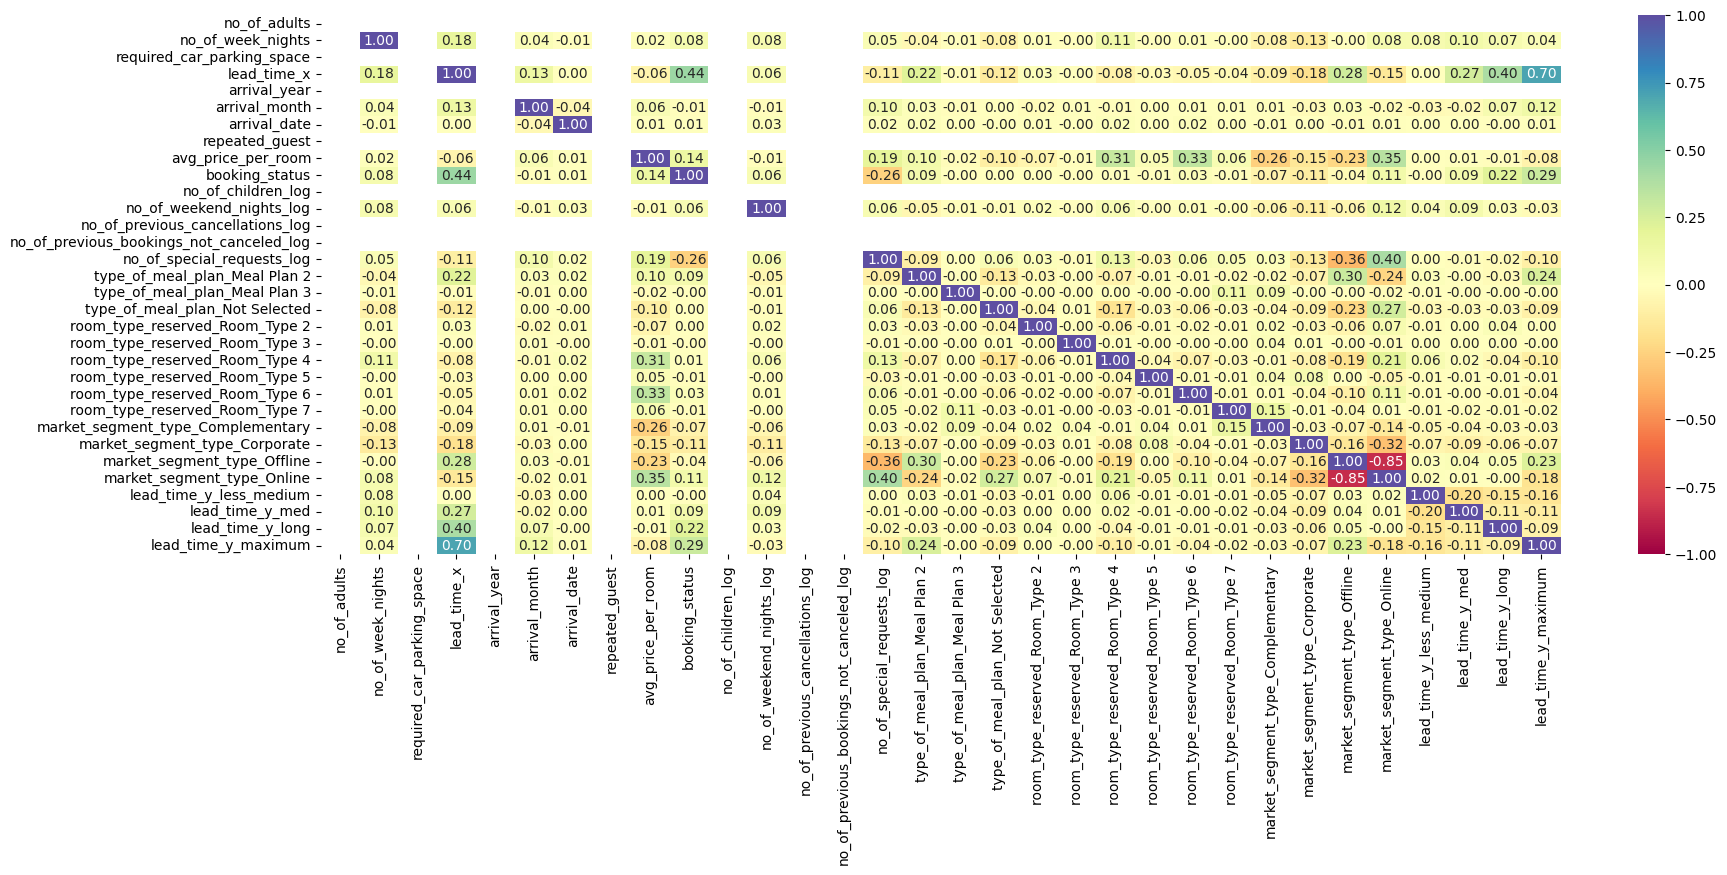

In [1957]:
plt.figure(figsize=(20, 7))
sns.heatmap(
    lead_data2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Since, we can't actually get the clear visualization of the multicolinearity so, we will try pairplot and vif's

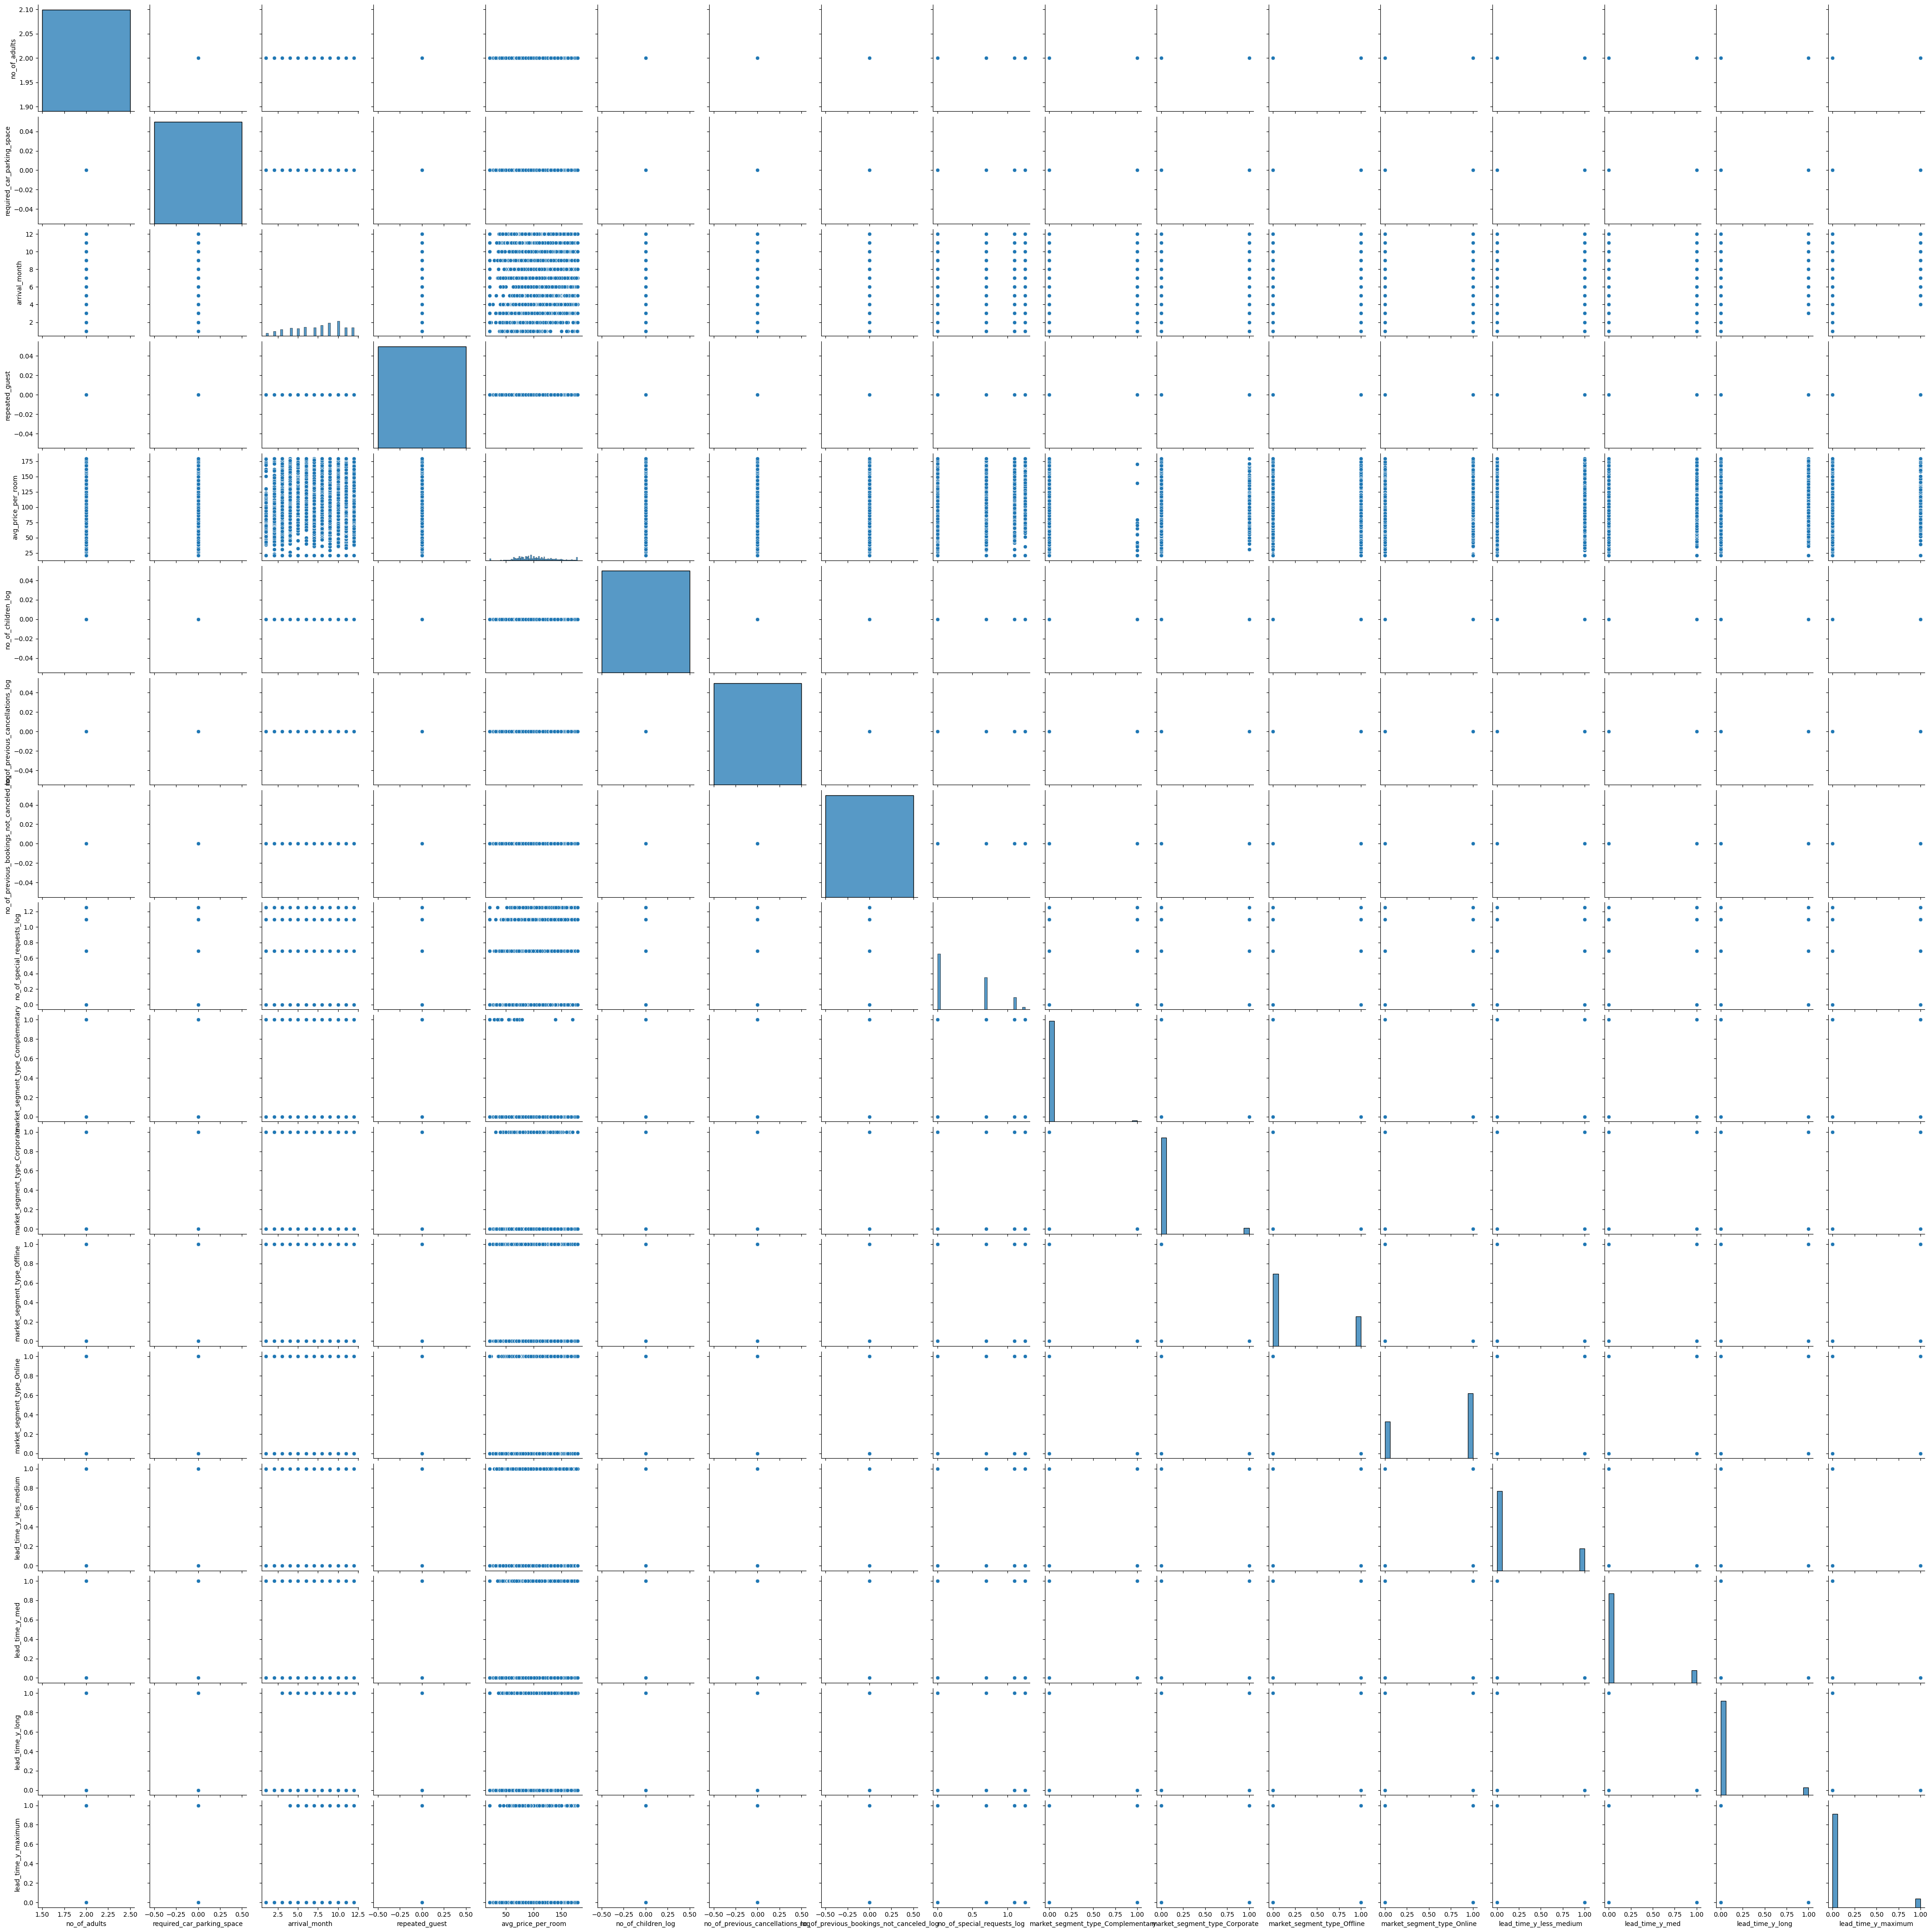

In [1958]:
sns.pairplot(lead_data2[['no_of_adults',
 'required_car_parking_space',
 'arrival_month',
 'repeated_guest',
 'avg_price_per_room',
 'no_of_children_log',
 'no_of_previous_cancellations_log',
 'no_of_previous_bookings_not_canceled_log',
 'no_of_special_requests_log',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online',
 'lead_time_y_less_medium',
 'lead_time_y_med',
 'lead_time_y_long',
 'lead_time_y_maximum']]);

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [1959]:
from statsmodels.stats import outliers_influence
vif_series = pd.Series(
    [outliers_influence.variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series));

Series before feature selection: 

no_of_adults                                 0.000000
no_of_week_nights                            1.095664
required_car_parking_space                        NaN
lead_time_x                                 24.170943
arrival_year                                 0.000000
arrival_month                                1.052869
arrival_date                                 1.006426
repeated_guest                                    NaN
avg_price_per_room                           1.759580
no_of_children_log                                NaN
no_of_weekend_nights_log                     1.050659
no_of_previous_cancellations_log                  NaN
no_of_previous_bookings_not_canceled_log          NaN
no_of_special_requests_log                   1.232613
type_of_meal_plan_Meal Plan 2                1.224260
type_of_meal_plan_Meal Plan 3                1.024311
type_of_meal_plan_Not Selected               1.232697
room_type_reserved_Room_Type 2               1.

* `lead_time_x`, `market_segment_type_Corporate `, and some categorical levels of `market_segment_type_Offline`, `market_segment_type_Online`, and `lead_time_y_maximum` exhibit high multicollinearity

* We see that some variables have *NaN* values for VIF
  

* As we saw in our earlier analysis that wherever workclass has unknown values occupation is also unknown.
  * The high correlation between these variables has been highlighted in the VIF values as well


In [1960]:
from statsmodels.stats import outliers_influence
X_train2 = X_train.drop("market_segment_type_Corporate", axis=1)

vif_series3 = pd.Series(
    [outliers_influence.variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

no_of_adults                                 0.000000
no_of_week_nights                            1.094080
required_car_parking_space                        NaN
lead_time_x                                 24.149914
arrival_year                                 0.000000
arrival_month                                1.052863
arrival_date                                 1.006410
repeated_guest                                    NaN
avg_price_per_room                           1.758605
no_of_children_log                                NaN
no_of_weekend_nights_log                     1.049032
no_of_previous_cancellations_log                  NaN
no_of_previous_bookings_not_canceled_log          NaN
no_of_special_requests_log                   1.231597
type_of_meal_plan_Meal Plan 2                1.224245
type_of_meal_plan_Meal Plan 3                1.024310
type_of_meal_plan_Not Selected               1.232030
room_type_reserved_Room_Type 2               1.

In [1961]:
X_train3 = X_train2.drop("lead_time_y_maximum", axis=1)

vif_series3 = pd.Series(
    [outliers_influence.variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

no_of_adults                                0.000000
no_of_week_nights                           1.089949
required_car_parking_space                       NaN
lead_time_x                                 1.639874
arrival_year                                0.000000
arrival_month                               1.052492
arrival_date                                1.005843
repeated_guest                                   NaN
avg_price_per_room                          1.758425
no_of_children_log                               NaN
no_of_weekend_nights_log                    1.048787
no_of_previous_cancellations_log                 NaN
no_of_previous_bookings_not_canceled_log         NaN
no_of_special_requests_log                  1.231577
type_of_meal_plan_Meal Plan 2               1.223989
type_of_meal_plan_Meal Plan 3               1.024310
type_of_meal_plan_Not Selected              1.232003
room_type_reserved_Room_Type 2              1.032836
room_type_r

## Logistic Regression model

In [1962]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [1963]:
logit = sm.Logit(y_train-1, X_train3.astype(float))
lg = logit.fit(method = 'bfgs')
lg.summary()


         Current function value: 0.431299
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 40


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Mon, 17 Jul 2023   Pseudo R-squ.:                  0.3194
Time:                        03:23:52   Log-Likelihood:                -10952.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
no_of_adults                              1.896e-06        nan        nan        nan         nan         nan
no_of_week_nights                           -0.0260        nan        nan        nan         nan         nan
required_car_parking_space                        0        nan        nan        nan         nan         nan
lead_time_x                                 -0.0168        nan        nan        nan         nan         nan
arrival_year                                 0.0019        nan        nan        nan         nan         nan
arrival_month                                0.0636        nan        nan        nan         nan         nan
arrival_date                                -0.0010        nan        nan        nan         nan         nan
repeated_guest                                    0        nan        nan        nan         nan         nan
avg_price_per_room                          -0.0210        nan        nan        nan         nan         nan
no_of_children_log                                0        nan        nan        nan         nan         nan
no_of_weekend_nights_log                    -0.1577        nan        nan        nan         nan         nan
no_of_previous_cancellations_log                  0        nan        nan        nan         nan         nan
no_of_previous_bookings_not_canceled_log          0        nan        nan        nan         nan         nan
no_of_special_requests_log                   2.4792        nan        nan        nan         nan         nan
type_of_meal_plan_Meal Plan 2               -0.2452        nan        nan        nan         nan         nan
type_of_meal_plan_Meal Plan 3               -0.0081        nan        nan        nan         nan         nan
type_of_meal_plan_Not Selected              -0.4118        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 2               0.1757        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 3              -0.0005        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 4               0.2090        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 5               0.1705        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 6               0.3845        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 7               0.0829        nan        nan        nan         nan         nan
market_segment_type_Complementary            0.0803        nan        nan        nan         nan         nan
market_segment_type_Offline                  0.8759        nan        nan        nan         nan         nan
market_segment_type_Online                  -0.9864        nan        nan        nan         nan         nan
lead_time_y_less_medium                     -0.2021        nan        nan       

In [1964]:
vif_series3 = pd.Series(
    [outliers_influence.variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

no_of_adults                                0.000000
no_of_week_nights                           1.089949
required_car_parking_space                       NaN
lead_time_x                                 1.639874
arrival_year                                0.000000
arrival_month                               1.052492
arrival_date                                1.005843
repeated_guest                                   NaN
avg_price_per_room                          1.758425
no_of_children_log                               NaN
no_of_weekend_nights_log                    1.048787
no_of_previous_cancellations_log                 NaN
no_of_previous_bookings_not_canceled_log         NaN
no_of_special_requests_log                  1.231577
type_of_meal_plan_Meal Plan 2               1.223989
type_of_meal_plan_Meal Plan 3               1.024310
type_of_meal_plan_Not Selected              1.232003
room_type_reserved_Room_Type 2              1.032836
room_type_r

In [1965]:
pv_train = lg.predict(X_train3) > 0.5
pv_train = np.round(pv_train)

In [1966]:
X_train4 = X_train3.drop(['room_type_reserved_Room_Type 3'], axis=1)
X_train4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25392 entries, 13662 to 33003
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   no_of_adults                              25392 non-null  float64
 1   no_of_week_nights                         25392 non-null  float64
 2   required_car_parking_space                25392 non-null  float64
 3   lead_time_x                               25392 non-null  float64
 4   arrival_year                              25392 non-null  float64
 5   arrival_month                             25392 non-null  float64
 6   arrival_date                              25392 non-null  float64
 7   repeated_guest                            25392 non-null  float64
 8   avg_price_per_room                        25392 non-null  float64
 9   no_of_children_log                        25392 non-null  float64
 10  no_of_weekend_nights_log           

In [1967]:
logit = sm.Logit(y_train-1, X_train4.astype(float))
lg2 = logit.fit(method = 'bfgs')
lg2.summary()


         Current function value: 0.431299
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 40


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Mon, 17 Jul 2023   Pseudo R-squ.:                  0.3194
Time:                        03:23:53   Log-Likelihood:                -10952.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
no_of_adults                              1.896e-06        nan        nan        nan         nan         nan
no_of_week_nights                           -0.0260        nan        nan        nan         nan         nan
required_car_parking_space                        0        nan        nan        nan         nan         nan
lead_time_x                                 -0.0168        nan        nan        nan         nan         nan
arrival_year                                 0.0019        nan        nan        nan         nan         nan
arrival_month                                0.0636        nan        nan        nan         nan         nan
arrival_date                                -0.0010        nan        nan        nan         nan         nan
repeated_guest                                    0        nan        nan        nan         nan         nan
avg_price_per_room                          -0.0210        nan        nan        nan         nan         nan
no_of_children_log                                0        nan        nan        nan         nan         nan
no_of_weekend_nights_log                    -0.1577        nan        nan        nan         nan         nan
no_of_previous_cancellations_log                  0        nan        nan        nan         nan         nan
no_of_previous_bookings_not_canceled_log          0        nan        nan        nan         nan         nan
no_of_special_requests_log                   2.4792        nan        nan        nan         nan         nan
type_of_meal_plan_Meal Plan 2               -0.2452        nan        nan        nan         nan         nan
type_of_meal_plan_Meal Plan 3               -0.0081        nan        nan        nan         nan         nan
type_of_meal_plan_Not Selected              -0.4118        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 2               0.1757        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 4               0.2090        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 5               0.1705        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 6               0.3845        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 7               0.0829        nan        nan        nan         nan         nan
market_segment_type_Complementary            0.0803        nan        nan        nan         nan         nan
market_segment_type_Offline                  0.8759        nan        nan        nan         nan         nan
market_segment_type_Online                  -0.9864        nan        nan        nan         nan         nan
lead_time_y_less_medium                     -0.2021        nan        nan        nan         nan         nan
lead_time_y_med                              0.1829        nan        nan       

Didn't have any difference let's try dropping another variable 

In [1968]:
X_train5 = X_train4.drop(['type_of_meal_plan_Meal Plan 3'], axis=1)

In [1969]:
logit = sm.Logit(y_train-1, X_train5.astype(float))
lg3 = logit.fit(method = 'bfgs')
lg3.summary()

         Current function value: 0.431299
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 40


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Mon, 17 Jul 2023   Pseudo R-squ.:                  0.3194
Time:                        03:23:54   Log-Likelihood:                -10952.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
no_of_adults                              1.896e-06        nan        nan        nan         nan         nan
no_of_week_nights                           -0.0260        nan        nan        nan         nan         nan
required_car_parking_space                        0        nan        nan        nan         nan         nan
lead_time_x                                 -0.0168        nan        nan        nan         nan         nan
arrival_year                                 0.0019        nan        nan        nan         nan         nan
arrival_month                                0.0636        nan        nan        nan         nan         nan
arrival_date                                -0.0010        nan        nan        nan         nan         nan
repeated_guest                                    0        nan        nan        nan         nan         nan
avg_price_per_room                          -0.0210        nan        nan        nan         nan         nan
no_of_children_log                                0        nan        nan        nan         nan         nan
no_of_weekend_nights_log                    -0.1577        nan        nan        nan         nan         nan
no_of_previous_cancellations_log                  0        nan        nan        nan         nan         nan
no_of_previous_bookings_not_canceled_log          0        nan        nan        nan         nan         nan
no_of_special_requests_log                   2.4792        nan        nan        nan         nan         nan
type_of_meal_plan_Meal Plan 2               -0.2452        nan        nan        nan         nan         nan
type_of_meal_plan_Not Selected              -0.4118        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 2               0.1757        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 4               0.2090        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 5               0.1705        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 6               0.3845        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 7               0.0829        nan        nan        nan         nan         nan
market_segment_type_Complementary            0.0803        nan        nan        nan         nan         nan
market_segment_type_Offline                  0.8759        nan        nan        nan         nan         nan
market_segment_type_Online                  -0.9864        nan        nan        nan         nan         nan
lead_time_y_less_medium                     -0.2021        nan        nan        nan         nan         nan
lead_time_y_med                              0.1829        nan        nan        nan         nan         nan
lead_time_y_long                            -0.3541        nan        nan       

In [1970]:
logit3 = sm.Logit(y_train-1, X_train5.astype(float))
lg6 = logit3.fit(method = 'bfgs')

print("Training performance:")
model_performance_classification_statsmodels(lg6, X_train5, y_train-1)

         Current function value: 0.431299
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 40
Training performance:


Accuracy    Recall  Precision        F1
0  0.804151  0.891832   0.829075  0.859309

In [1971]:
vif_series3 = pd.Series(
    [outliers_influence.variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])],
    index=X_train5.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

no_of_adults                                0.000000
no_of_week_nights                           1.089923
required_car_parking_space                       NaN
lead_time_x                                 1.639860
arrival_year                                0.000000
arrival_month                               1.052071
arrival_date                                1.005800
repeated_guest                                   NaN
avg_price_per_room                          1.758300
no_of_children_log                               NaN
no_of_weekend_nights_log                    1.048771
no_of_previous_cancellations_log                 NaN
no_of_previous_bookings_not_canceled_log         NaN
no_of_special_requests_log                  1.231277
type_of_meal_plan_Meal Plan 2               1.223946
type_of_meal_plan_Not Selected              1.231886
room_type_reserved_Room_Type 2              1.032822
room_type_reserved_Room_Type 4              1.296750
room_type_r

In [1972]:
X_train6 = X_train5.drop(['market_segment_type_Online'], axis=1)

In [1973]:
logit = sm.Logit(y_train-1, X_train6.astype(float))
lg4 = logit.fit(method = 'bfgs')
lg4.summary()

         Current function value: 0.433770
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 40


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Mon, 17 Jul 2023   Pseudo R-squ.:                  0.3155
Time:                        03:23:56   Log-Likelihood:                -11014.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
no_of_adults                              1.601e-06        nan        nan        nan         nan         nan
no_of_week_nights                           -0.0390        nan        nan        nan         nan         nan
required_car_parking_space                        0        nan        nan        nan         nan         nan
lead_time_x                                 -0.0171        nan        nan        nan         nan         nan
arrival_year                                 0.0016        nan        nan        nan         nan         nan
arrival_month                                0.0656        nan        nan        nan         nan         nan
arrival_date                              3.054e-05        nan        nan        nan         nan         nan
repeated_guest                                    0        nan        nan        nan         nan         nan
avg_price_per_room                          -0.0226        nan        nan        nan         nan         nan
no_of_children_log                                0        nan        nan        nan         nan         nan
no_of_weekend_nights_log                    -0.2474        nan        nan        nan         nan         nan
no_of_previous_cancellations_log                  0        nan        nan        nan         nan         nan
no_of_previous_bookings_not_canceled_log          0        nan        nan        nan         nan         nan
no_of_special_requests_log                   2.4273        nan        nan        nan         nan         nan
type_of_meal_plan_Meal Plan 2               -0.1986        nan        nan        nan         nan         nan
type_of_meal_plan_Not Selected              -0.5526        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 2               0.0972        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 4               0.1737        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 5               0.2082        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 6               0.3450        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 7               0.0871        nan        nan        nan         nan         nan
market_segment_type_Complementary            0.1068        nan        nan        nan         nan         nan
market_segment_type_Offline                  1.7255        nan        nan        nan         nan         nan
lead_time_y_less_medium                     -0.2146        nan        nan        nan         nan         nan
lead_time_y_med                              0.1477        nan        nan        nan         nan         nan
lead_time_y_long                            -0.3489        nan        nan        nan         nan         nan
================================================================================

In [1974]:
logit2 = sm.Logit(y_train-1, X_train6.astype(float))
lg5 = logit2.fit(method = 'bfgs')

print("Training performance:")
model_performance_classification_statsmodels(lg5, X_train6, y_train-1)

         Current function value: 0.433770
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 40
Training performance:


Accuracy    Recall  Precision        F1
0  0.799779  0.889718   0.825353  0.856327

We actually do not see any significant change so, we will choose the model we like from here.

## Final Model Summary

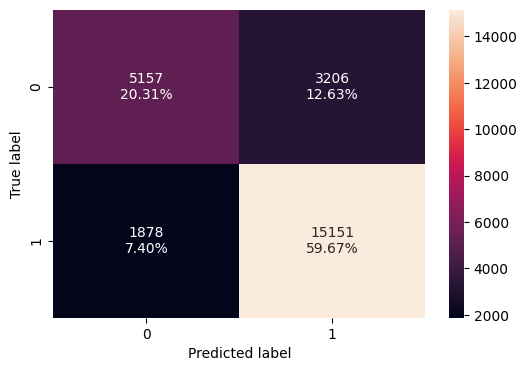

In [1975]:
confusion_matrix_statsmodels(lg5, X_train6, y_train-1)

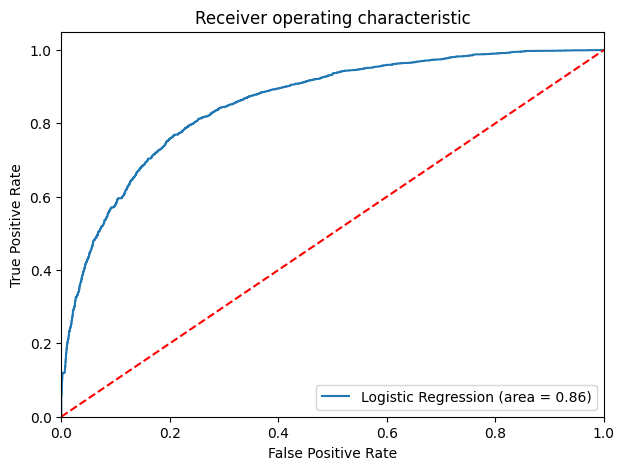

In [1976]:
logit_roc_auc_train = roc_auc_score(y_train-1, lg5.predict(X_train6))
fpr, tpr, thresholds = roc_curve(y_train-1, lg5.predict(X_train6))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()


* Logistic Regression model is giving a good performance on training set.

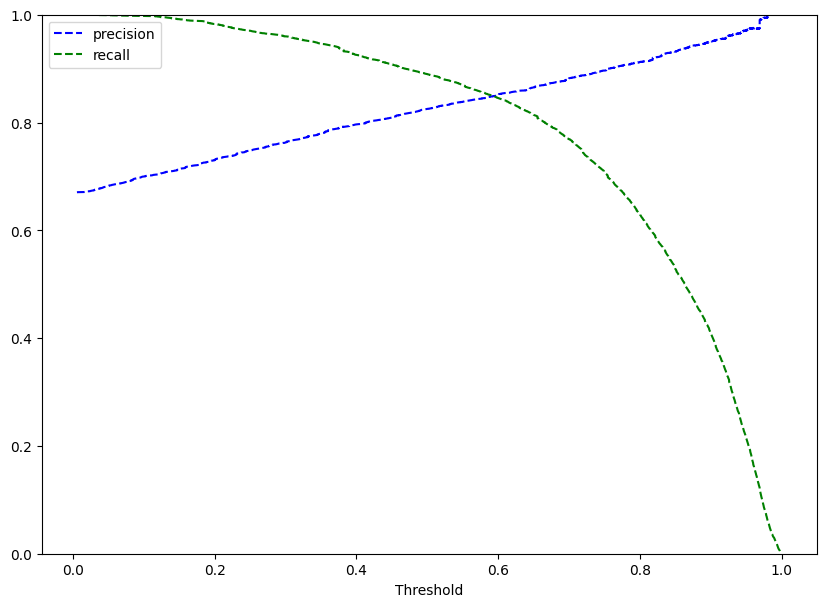

In [1977]:
y_scores = lg5.predict(X_train6)
prec, rec, tre = precision_recall_curve(y_train-1, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.58, we get balanced recall and precision.


In [1978]:
# setting the threshold
optimal_threshold_curve = 0.58

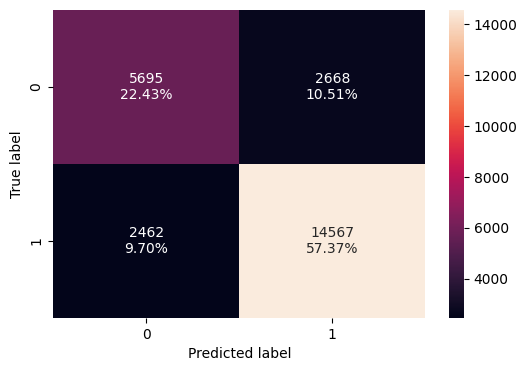

In [1979]:
confusion_matrix_statsmodels(lg5, X_train6, y_train-1, threshold=optimal_threshold_curve)

In [1980]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg5, X_train6, y_train-1, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision       F1
0  0.797968  0.855423   0.845199  0.85028

The F1 score seemed pretty satisfactory ~.85 so, we can now focus on the decsion tree

## Building a Decision Tree model

In [1981]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [1982]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train-1)

DecisionTreeClassifier(random_state=1)

In [1983]:
print("Accuracy on training set : ",dTree.score(X_train, y_train-1))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  0.9937381852551985
Accuracy on test set :  0.06321786272167601


In [1984]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_week_nights', 'required_car_parking_space', 'lead_time_x', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'avg_price_per_room', 'no_of_children_log', 'no_of_weekend_nights_log', 'no_of_previous_cancellations_log', 'no_of_previous_bookings_not_canceled_log', 'no_of_special_requests_log', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'lead_time_y_less_medium', 'lead_time_y_med', 'lead_time_y_long', 'lead_time_y_maximum']


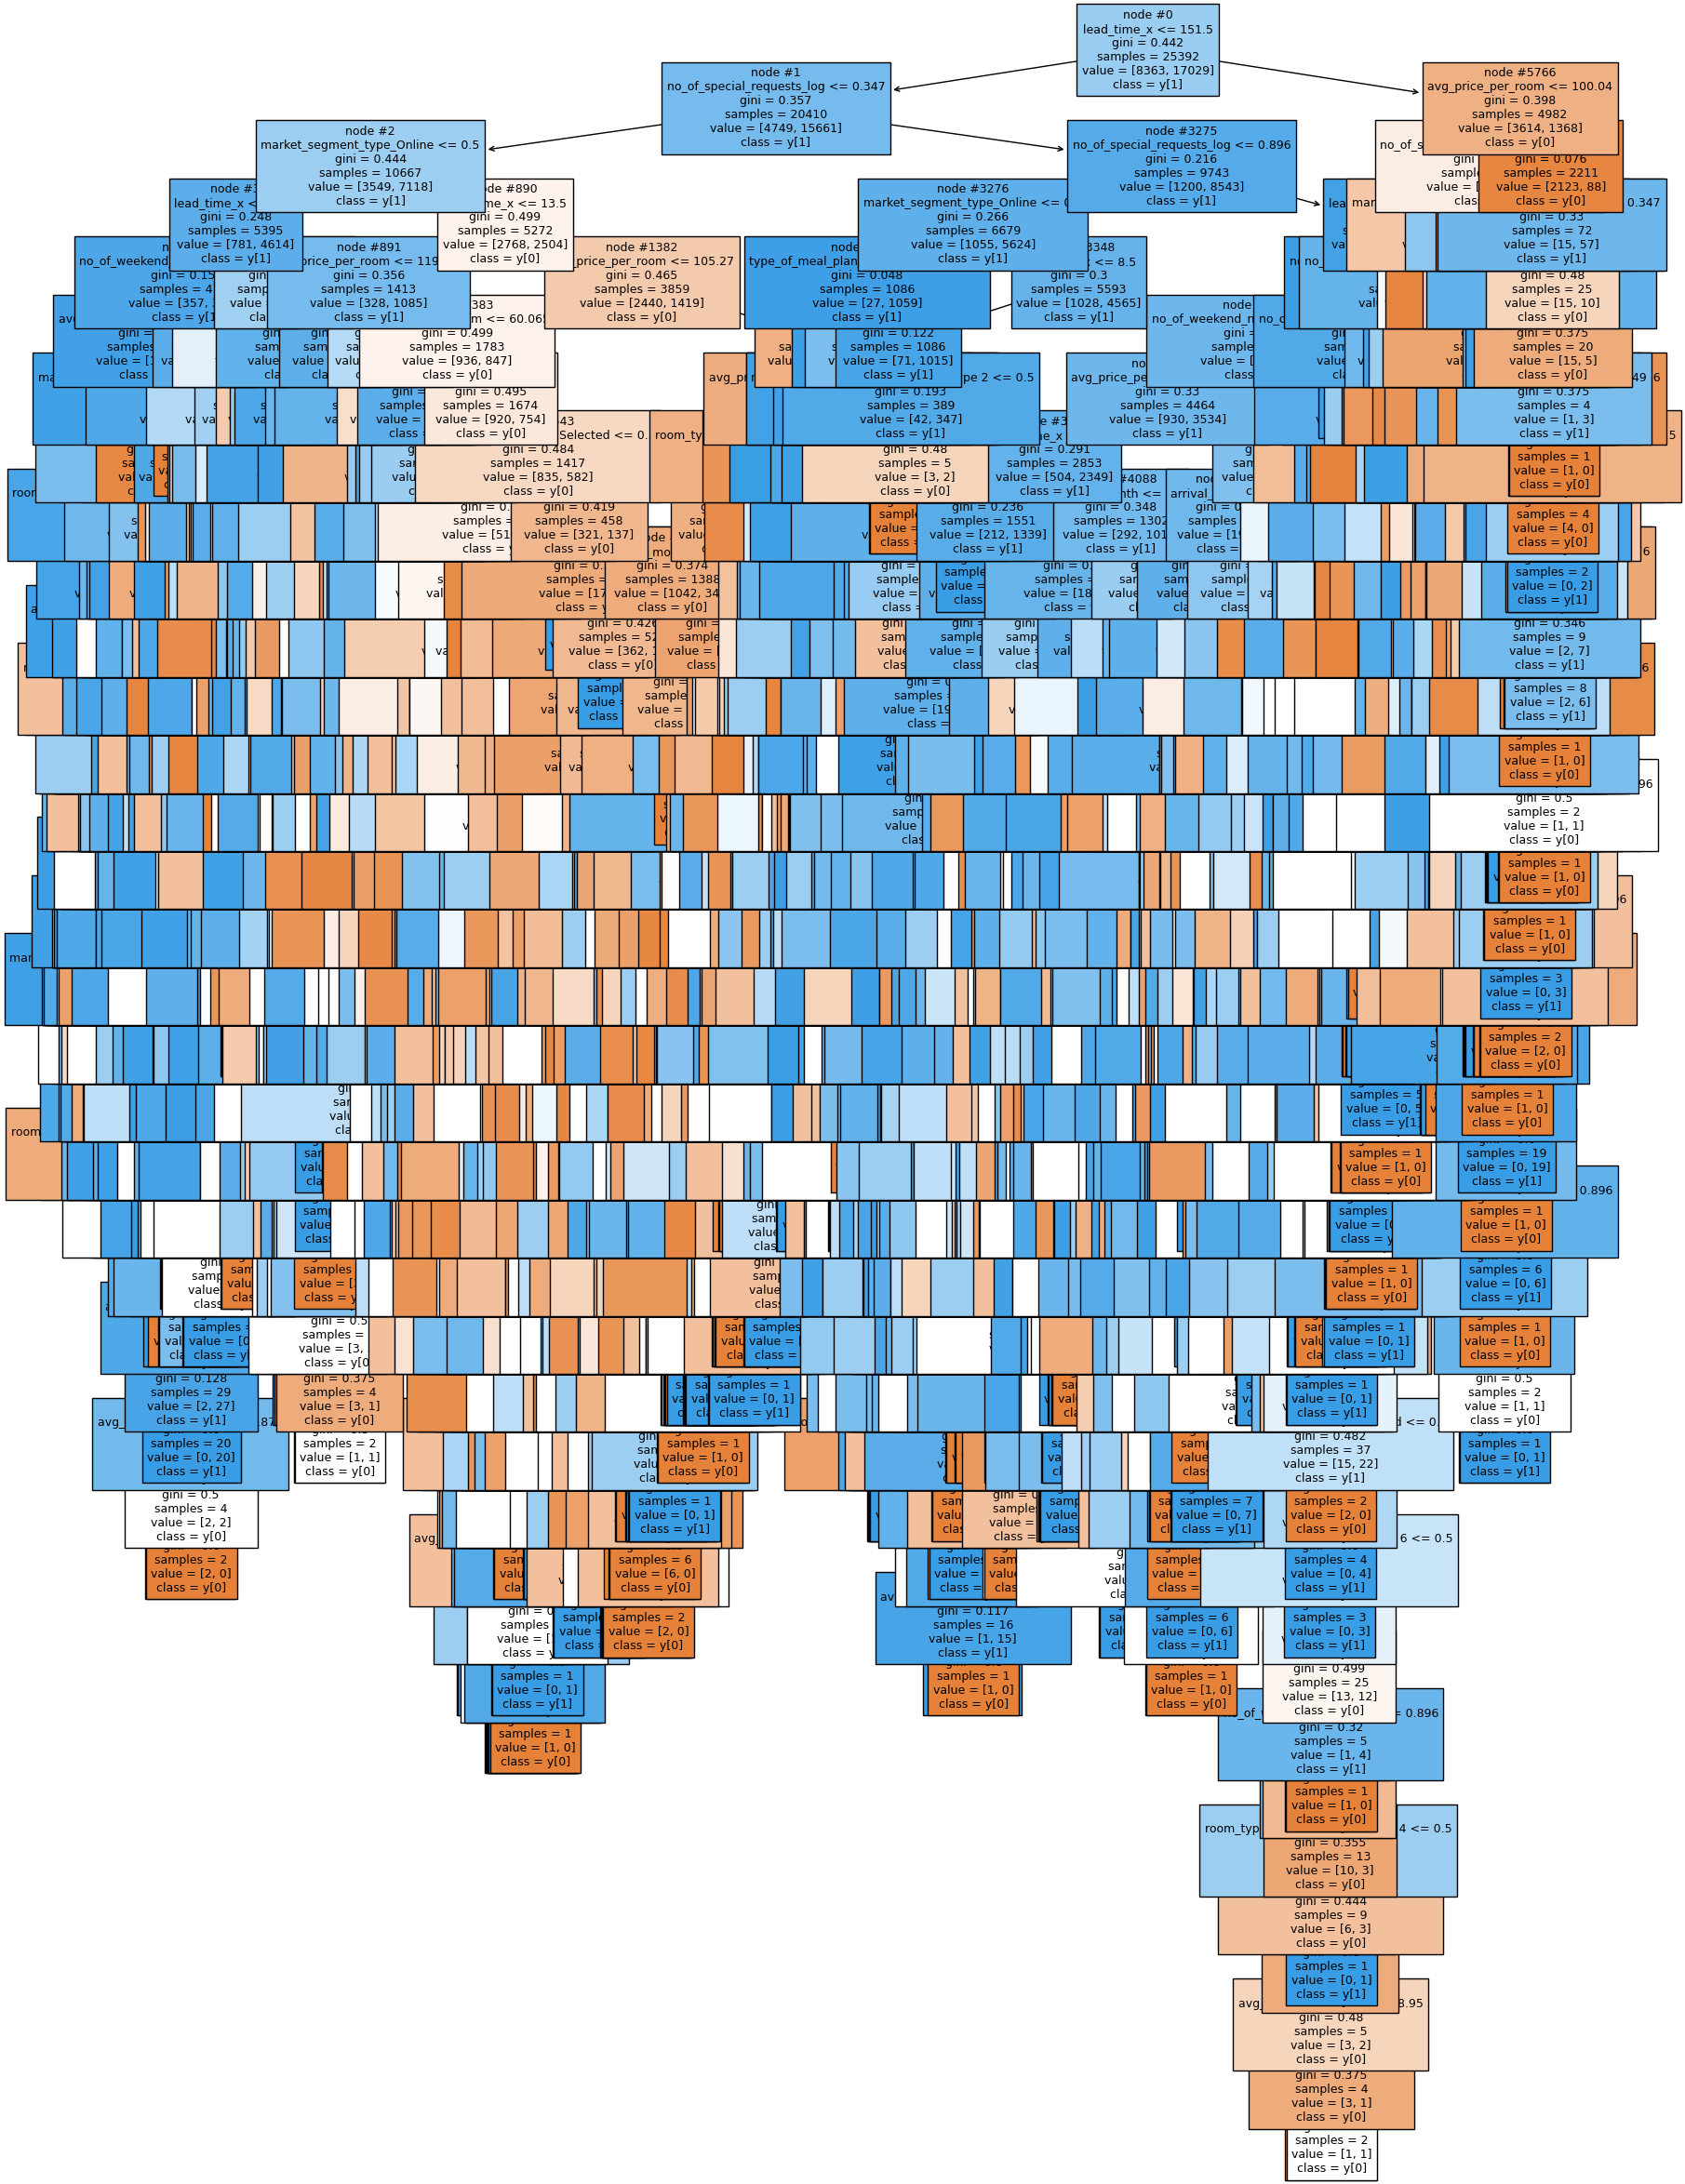

In [1985]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [1986]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- lead_time_x <= 151.50
|   |--- no_of_special_requests_log <= 0.35
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_x <= 90.50
|   |   |   |   |--- no_of_weekend_nights_log <= 0.35
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time_x <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 48.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 74.00] class: 1.0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  48.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_week_nights <= 4.50
|   |   |   |   |   |   |

In [1987]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                               Imp
lead_time_x                               0.348895
avg_price_per_room                        0.179867
arrival_date                              0.105978
market_segment_type_Online                0.094062
arrival_month                             0.072826
no_of_special_requests_log                0.067354
no_of_week_nights                         0.046329
no_of_weekend_nights_log                  0.042909
type_of_meal_plan_Not Selected            0.008992
room_type_reserved_Room_Type 4            0.008334
type_of_meal_plan_Meal Plan 2             0.005908
lead_time_y_less_medium                   0.003934
room_type_reserved_Room_Type 2            0.002964
lead_time_y_long                          0.002851
market_segment_type_Offline               0.002117
market_segment_type_Corporate             0.001357
lead_time_y_med                           0.001341
room_type_reserved_Room_Type 5            0.001315
lead_time_y_maximum            

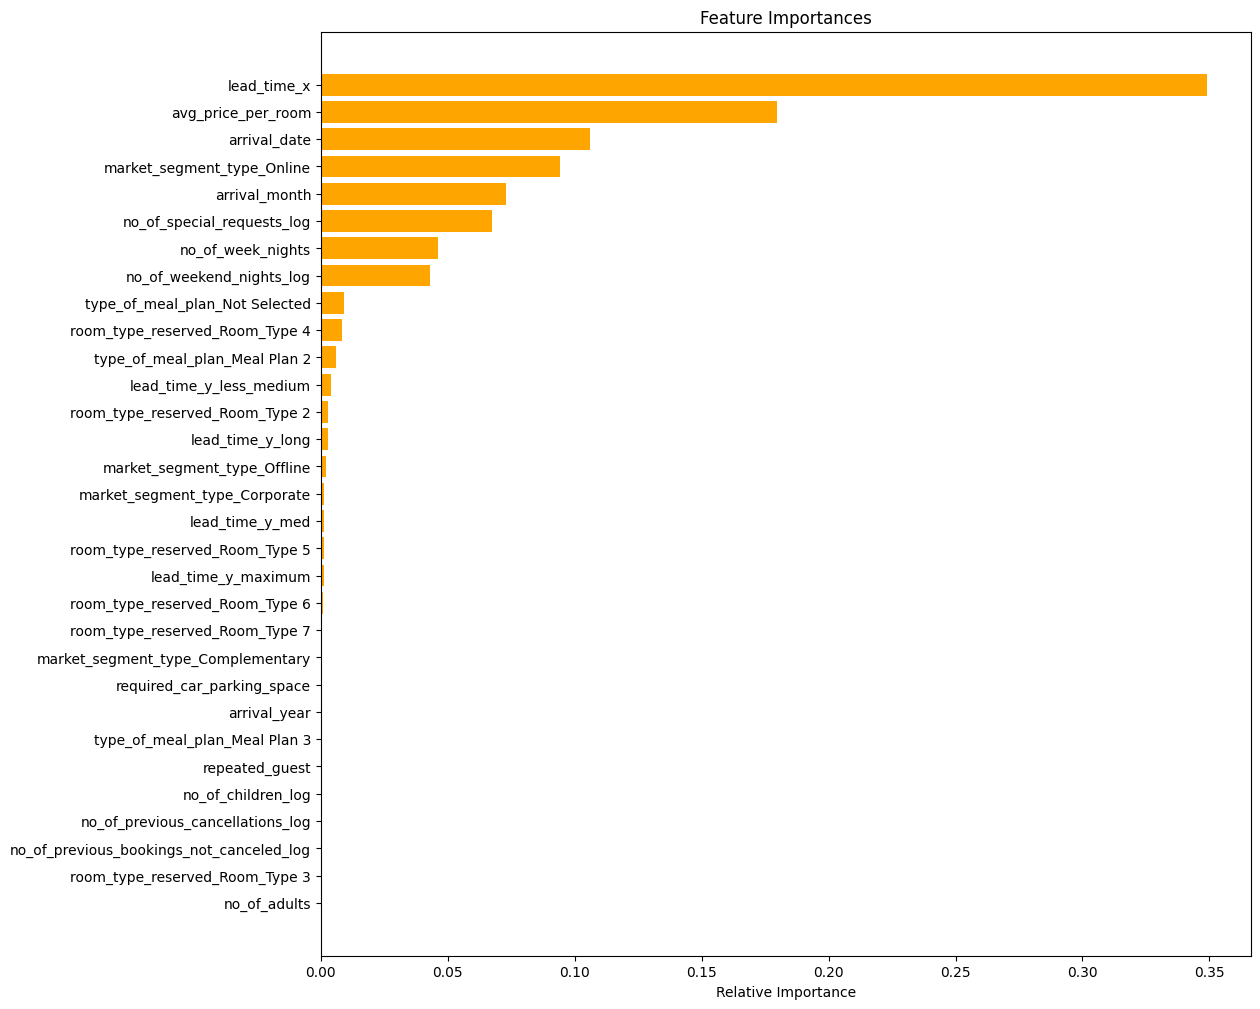

In [1988]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, 'Lead time' is the most important variable for predicting the high influence on booking cancellations.

## Do we need to prune the tree?

## Reducing Over-Fitting
* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
* Let's try Limiting the max_depth of tree to 3

In [1989]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train6, y_train-1)

DecisionTreeClassifier(max_depth=3, random_state=1)

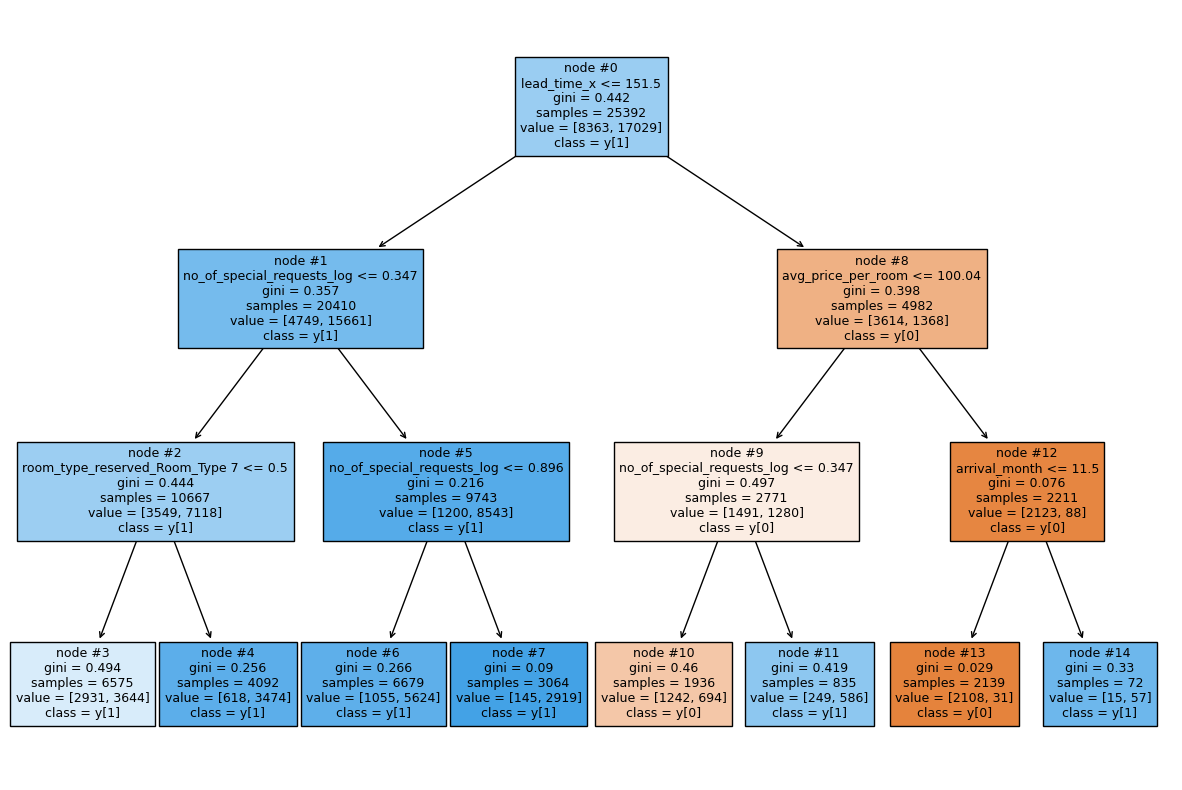

In [1990]:
#checking the pre-pruned tree
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

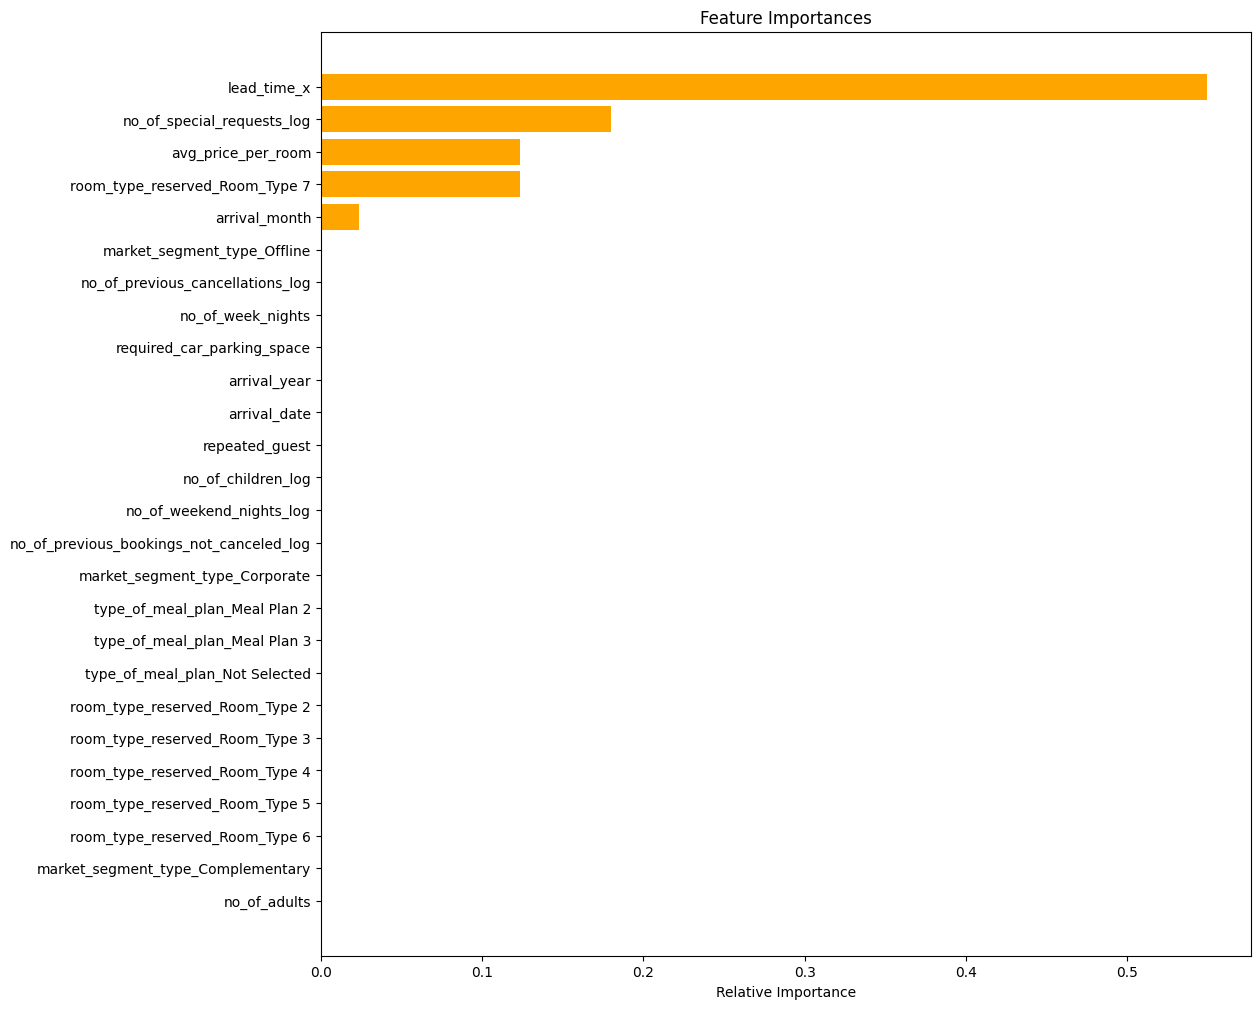

In [1991]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This time we can see 'lead_time_x' also came on top so, this variable actually has a great influence on our target.

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [1992]:
from sklearn.model_selection import GridSearchCV

In [1993]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

In [1994]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

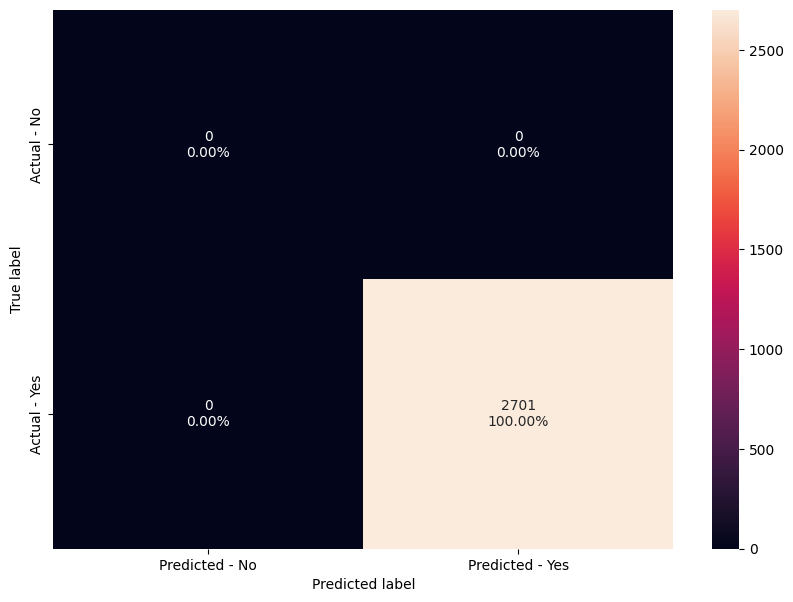

In [1995]:
make_confusion_matrix(estimator,y_test)

In [1996]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.7694943289224953
Accuracy on test set :  0.7719378847744188
Recall on training set :  0.7631232811192156
Recall on test set :  0.7668938103350369


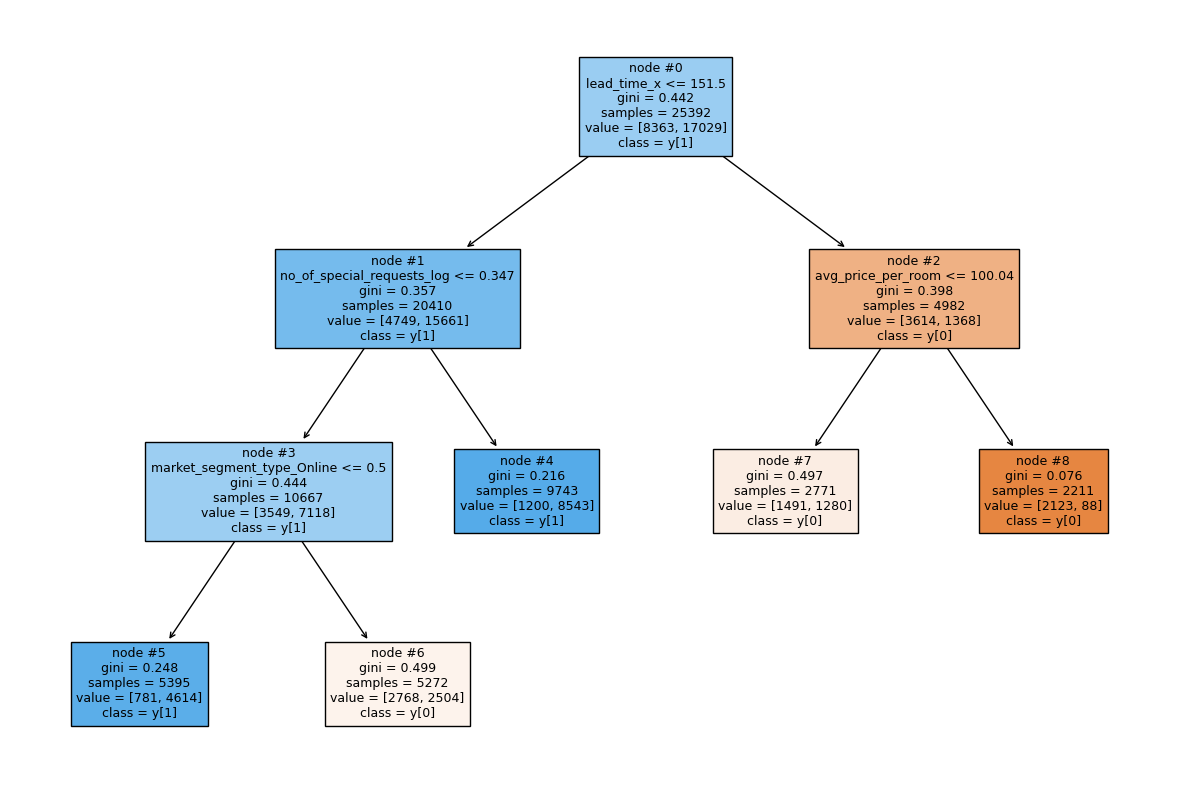

In [1997]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [1998]:
#Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- lead_time_x <= 151.50
|   |--- no_of_special_requests_log <= 0.35
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [781.00, 4614.00] class: 2.0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2768.00, 2504.00] class: 1.0
|   |--- no_of_special_requests_log >  0.35
|   |   |--- weights: [1200.00, 8543.00] class: 2.0
|--- lead_time_x >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1491.00, 1280.00] class: 1.0
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [2123.00, 88.00] class: 1.0



In [1999]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                               Imp
lead_time_x                               0.539970
market_segment_type_Online                0.214150
no_of_special_requests_log                0.124176
avg_price_per_room                        0.121704
market_segment_type_Complementary         0.000000
room_type_reserved_Room_Type 4            0.000000
room_type_reserved_Room_Type 5            0.000000
room_type_reserved_Room_Type 6            0.000000
room_type_reserved_Room_Type 7            0.000000
no_of_adults                              0.000000
market_segment_type_Corporate             0.000000
room_type_reserved_Room_Type 2            0.000000
market_segment_type_Offline               0.000000
lead_time_y_less_medium                   0.000000
lead_time_y_med                           0.000000
lead_time_y_long                          0.000000
room_type_reserved_Room_Type 3            0.000000
type_of_meal_plan_Meal Plan 3             0.000000
type_of_meal_plan_Not Selected 

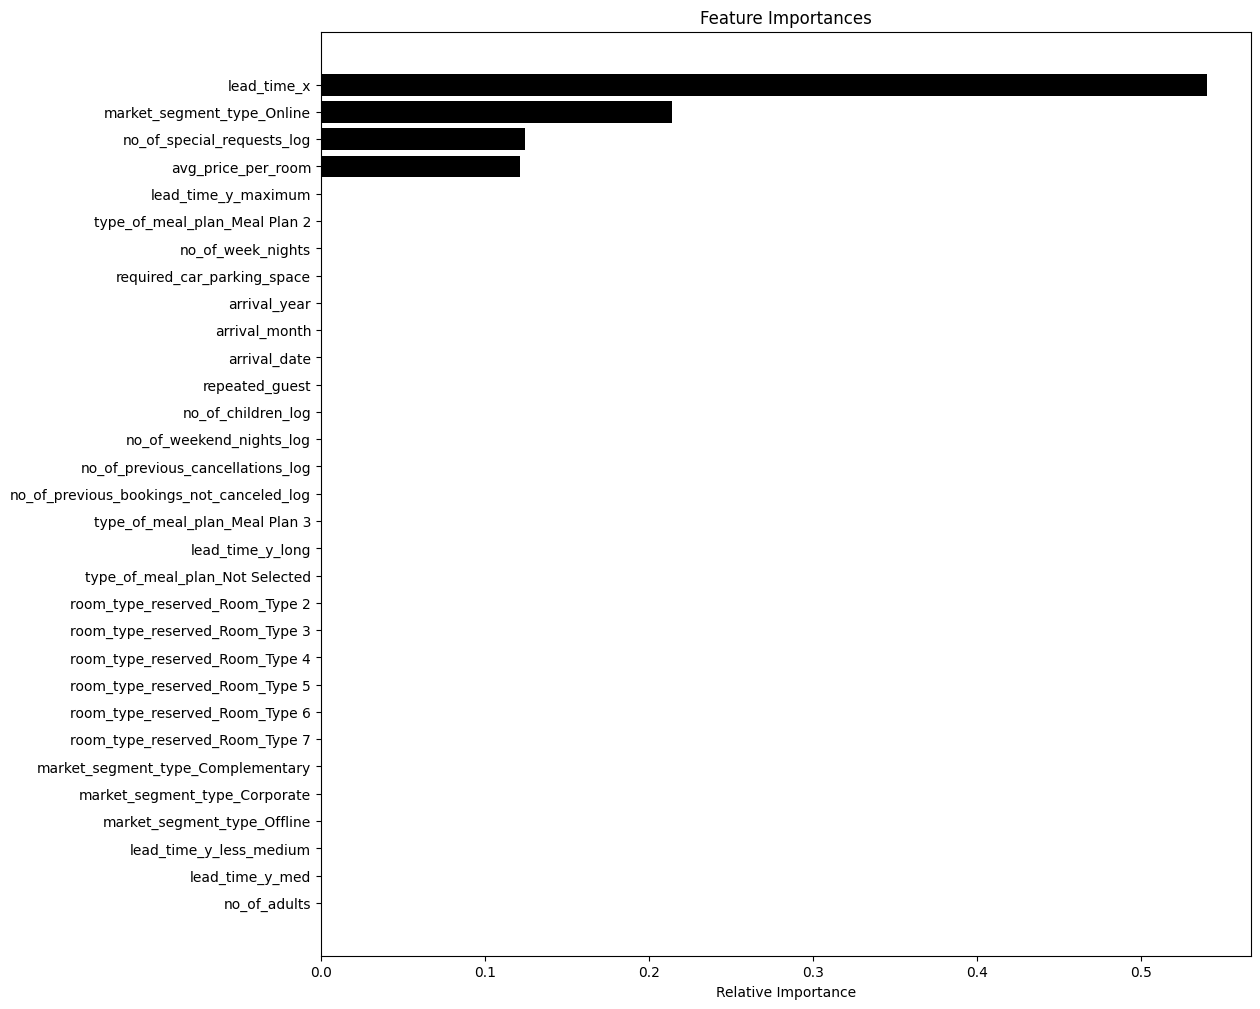

In [2000]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can see that market segment climbed up the chart opercoming number of special requests log. But, the importance of lead time still stayed the same

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.



In [2001]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [2002]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008107
1     4.327745e-07    0.008107
2     4.688391e-07    0.008108
3     6.223746e-07    0.008108
4     7.772858e-07    0.008109
...            ...         ...
1435  6.665684e-03    0.286897
1436  1.304480e-02    0.299942
1437  1.725993e-02    0.317202
1438  2.399048e-02    0.365183
1439  7.657789e-02    0.441761

[1440 rows x 2 columns]

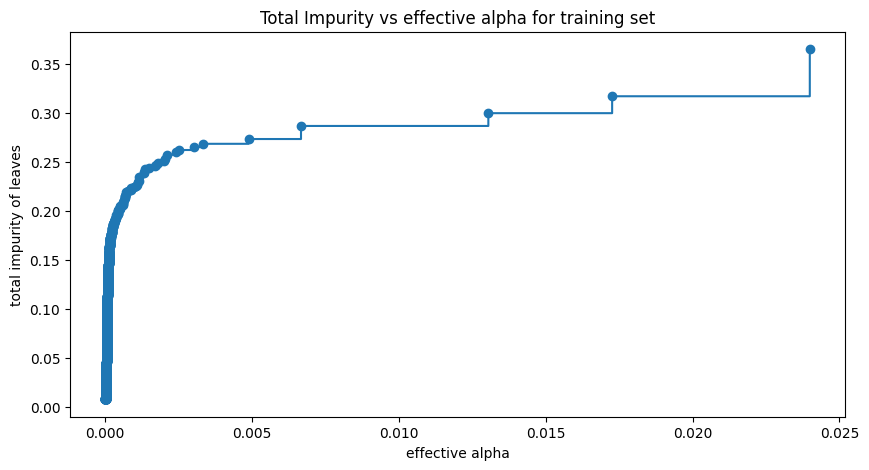

In [2003]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [2004]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371357


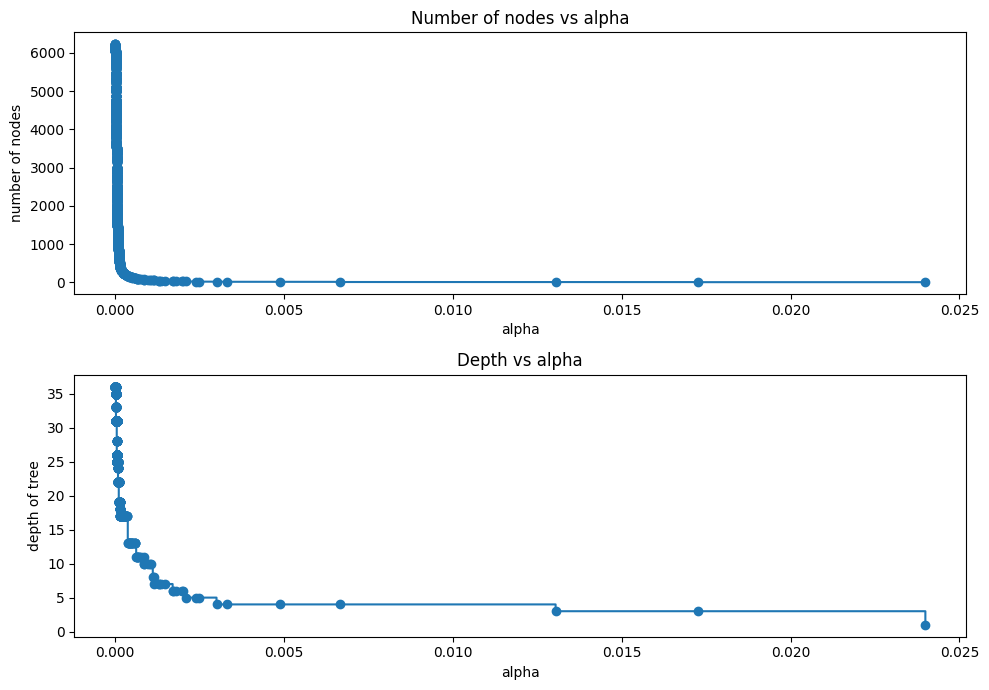

In [2005]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

We can see how it has barely any alpha value as more depth of the tree increased

In [2006]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

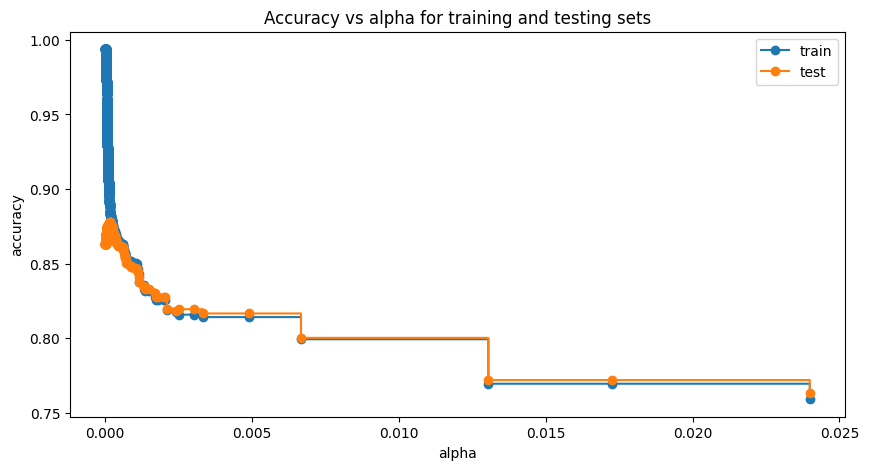

In [2007]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [2008]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00015766252489580833, random_state=1)
Training accuracy of best model:  0.8856332703213611
Test accuracy of best model:  0.8778829366902509


In [2009]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [2010]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

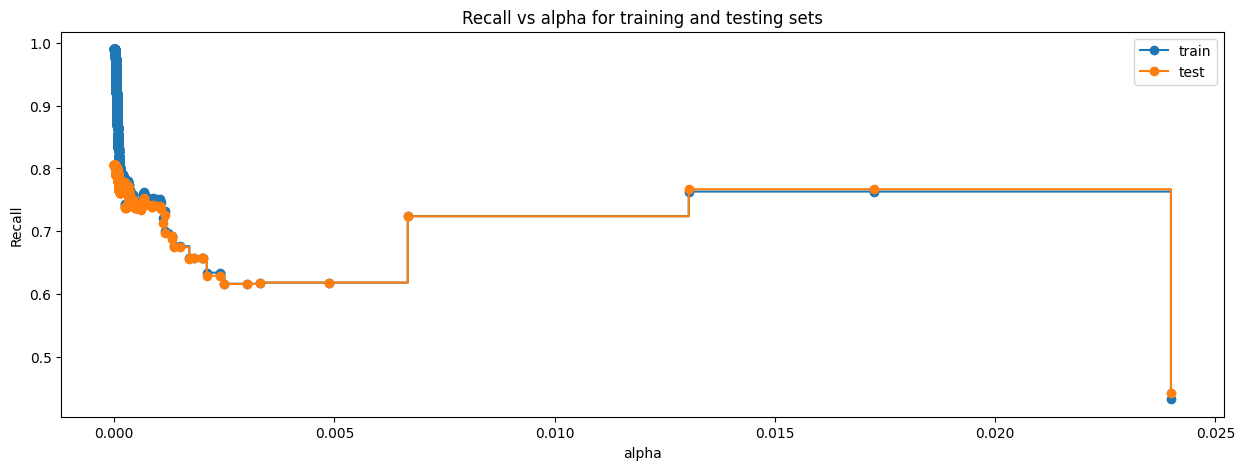

In [2011]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [2012]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=2.4796377978482587e-05, random_state=1)


## Confusion Matrix - post-pruned decision tree

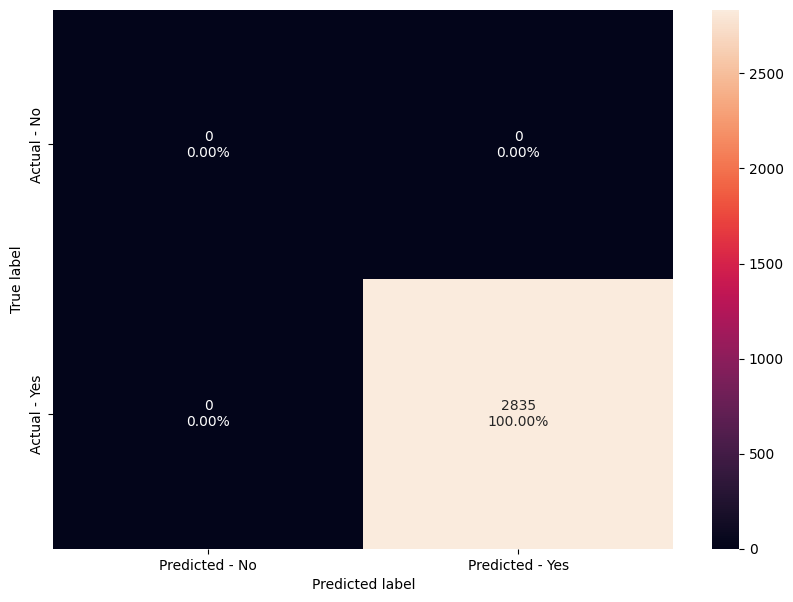

In [2013]:
make_confusion_matrix(best_model,y_test)

In [2014]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9855315078321176
Recall on test set :  0.8049403747870528


## Visualizing the Decision Tree

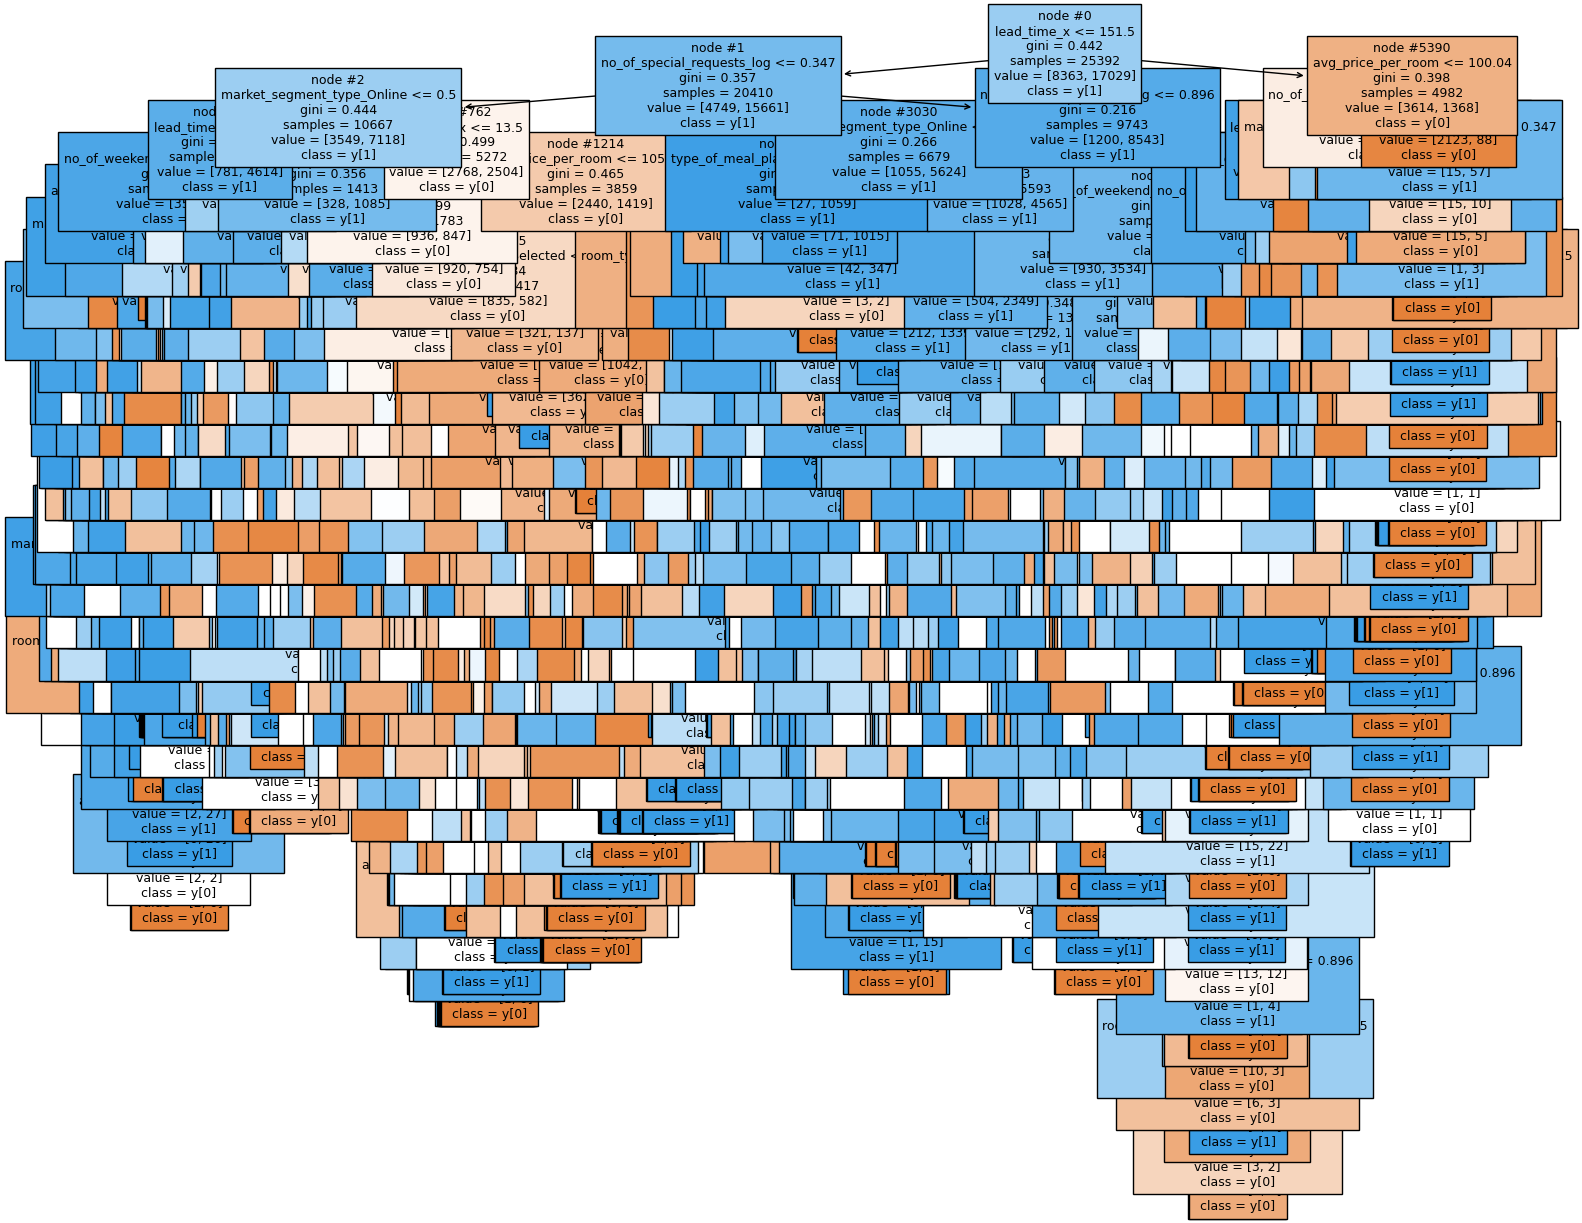

In [2015]:
plt.figure(figsize=(17,15))  #will generate the decsion tree

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [2016]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- lead_time_x <= 151.50
|   |--- no_of_special_requests_log <= 0.35
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_x <= 90.50
|   |   |   |   |--- no_of_weekend_nights_log <= 0.35
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time_x <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 48.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 74.00] class: 2.0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  48.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_week_nights <= 4.50
|   |   |   |   |   |   |

In [2017]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                               Imp
lead_time_x                               0.349499
avg_price_per_room                        0.179846
arrival_date                              0.105130
market_segment_type_Online                0.094804
arrival_month                             0.072937
no_of_special_requests_log                0.067885
no_of_week_nights                         0.045520
no_of_weekend_nights_log                  0.042777
type_of_meal_plan_Not Selected            0.008909
room_type_reserved_Room_Type 4            0.008337
type_of_meal_plan_Meal Plan 2             0.005955
lead_time_y_less_medium                   0.003812
room_type_reserved_Room_Type 2            0.002987
lead_time_y_long                          0.002874
market_segment_type_Offline               0.002134
lead_time_y_med                           0.001352
room_type_reserved_Room_Type 5            0.001325
market_segment_type_Corporate             0.001292
lead_time_y_maximum            

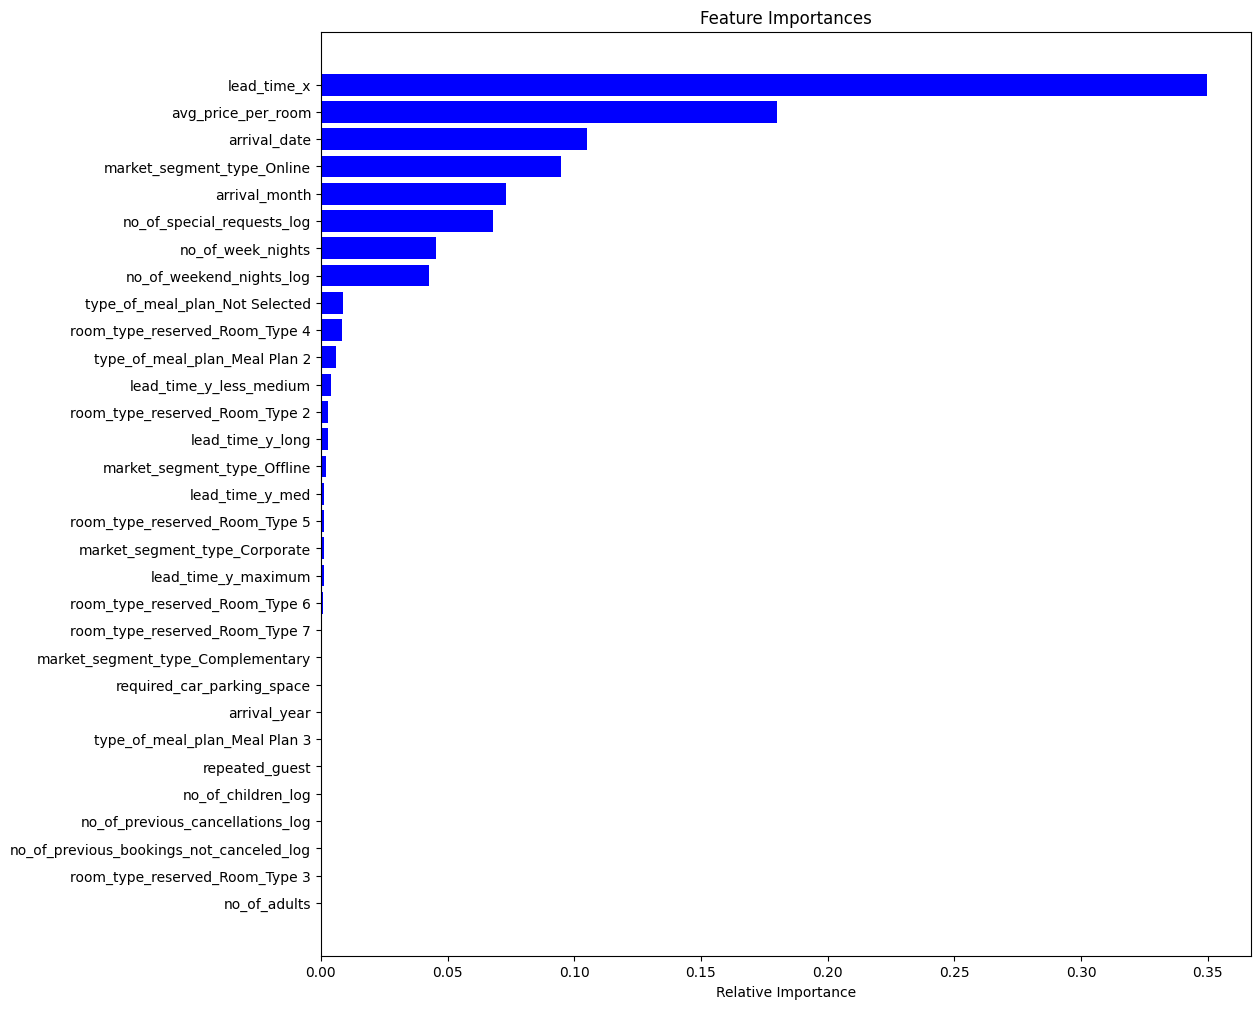

In [2018]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Lead time, Price and the arrival date are the most important influential features

## Conclusions

We can see the most important variables were lead time, the average price, average date and average month. And, through all the possible tests this is the best model for the above problem I think and this can also be used for future predictions too. 

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

## Since most of the customers are booking it online I, think that to restrict the refund policy atleast 2 weeks before can be an option.

## Again, since they are booking online so, I think 2 insurance system should be offered too which will gurantee them refund at the almost 3 days before and 24 hours.

## The hotel marketing teams should also focus on how to connect the hotel with hot events such as, competetive affordable rates during concerts, fashion shows, soccer games, racing events, tennis.

## The hotel marketing team should also focus on how the hotel rooms are being promoted on the top travelling apps and the research team can work on what places the customers wants to go the most after coming to Portugal.

## The hotel team can offer some coupons in the very popular destinantions at Ibiza with their choosing of the grade of rooms so it is easier and makes it less expensive for them.

## The hotel can arrange atleast two special nights of dance and music based on the local cultures and small artists for the customers which will also give them a different taste.

## If the hotel is around someplace like Lisbon where, lot of traffic jam may be expected the hotel management can actually promote more discounts on less busier months or more complementaries.

## The hotel should also study a bit more about what the pilots and cabin crews search for after a long range of duty maybe also prioritizing it may attract more airline companies too. 
